<a href="https://colab.research.google.com/github/zahrahaulia21/zahrahaulia_portfolio/blob/main/EDA%20for%20Property%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 1 Data Mining dan Business Intellegence**

## **EDA**

## **Anggota Kelompok E DMDBI (B)**
| No. | Nama| NPM|
|:---:|-----|:---:|
|1.|Diki Wahyudi|2106709131|
|2.|Jesica Michele Yulianto|2106725002|
|3.|Michael Rich Kharisma|2106724901|
|4.|Najwa Salsabila Hakim|2106726812|
|5.|Zahrah Aulia Putri|2106724896|

## Kasus
- Anda adalah seorang Data Analyst yang bekerja di **PT Ray Pink Property Indonesia** (RPPI).
- RPPI adalah perusahaan *property* yang berdiri sejak 11 tahun yang lalu.
- RPPI memliki kantor cabang di 7 provinsi di Indonesia dan jumlahnya terus bertambah.
- Valuasi RPPI tahun ini mencapai Rp7 Triliun, meningkat 7% dari tahun sebelumnya.
- Bidang usaha RPPI adalah investasi dan jual-beli *property* secara umum, termasuk bekerja sama dengan *developer* perumahan.
- Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
- Sebagai Data Analyst, Anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
- Di studi kasus ini, Anda mempersiapkan "bahan presentasi" (cukup `ipynb` saja) dengan cara melakukan **EDA** pada data yang diterima dari DE/DBA.




## Petunjuk

Di studi kasus pertama, Anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, Anda mendengar bahwa mereka ingin mengetahui:

- Kualitas data yang dimiliki perusahaan.
- Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data *driven company* yang unggul.
- Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
- Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data)
- Rumah dengan karakteristik seperti apa yang paling banyak dijual?
- Jika RPPI ingin melakukan investasi (*max*) Rp25 Miliar minggu besok, apakah dari data Anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
- Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

## *Data Understanding* (DU)
Keterangan variabel:
- Created_at: Tanggal di mana iklan rumah dibuat
- LT: Luas tanah properti yang ditawarkan
- LB: Luas bangunan properti yang ditawarkan
- KT: Jumlah kamar tidur properti yang ditawarkan
- KM: Jumlah kamar mandi properti yang ditawarkan
- Garasi: Jumlah kapasitas garasi di properti yang ditawarkan
- Carport: Kapasitas carport di properti yang ditawarkan
- Lokasi: Detail lokasi properti yang ditawarkan
- Sertifikat: Jenis sertifikat properti yang ditawarkan
- Listrik: Daya listrik dari properti yang ditawarkan
- Hadap: Keterangan properti yang ditawarkan menghadap ke arah mana
- Harga: Harga properti yang ditawarkan dalam Rupiah
- URL: Alamat tautan (*link*) properti yang ditawarkan
- Deskripsi : Deskripsi iklan properti yang ditawarkan

## Import Data

In [ ]:
import pandas as pd
url = "https://github.com/dikiwahyudi11/Case-Study-1-DMDBI/blob/main/Data-Property-Indonesia-Ganjil-2023.xlsx?raw=true"
sheets_dict = pd.read_excel(url, sheet_name = None, engine = 'openpyxl')
all_sheets = []

for name, sheet in sheets_dict.items():
  sheet['wilayah'] = name.title().replace(" ", "")
  all_sheets.append(sheet)

for i in range(0, 15):
  all_sheets[i].columns = all_sheets[i].columns.str.lower()
  all_sheets[i].rename(columns = {'lt (m2)': 'lt', 'lt(m²)': 'lt', 'lb (m2)': 'lb', 'lb(m²)': 'lb',
                        'harga (rp)': 'harga', 'deskripsi ': 'deskripsi'}, inplace = True)
df = pd.concat(all_sheets)
df.reset_index(inplace = True, drop = True)
df.columns

Index(['created_at', 'lt', 'lb', 'kt', 'km', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'url', 'deskripsi',
       'unnamed: 14', 'wilayah'],
      dtype='object')

In [ ]:
df['unnamed: 14'].unique()

array([nan, ' '], dtype=object)

Karena kolom `unnamed: 14` isinya hanya `nan` dan `' '` semua, maka kolom tersebut akan dihapus. Selain itu, karena kami tidak akan menganalisis bagian kolom deskripsi, maka kolom deskripsi juga akan dihapus.

In [ ]:
df = df.drop(['unnamed: 14', 'deskripsi'], axis = 1)

In [ ]:
df.head(15)

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,Bogor
1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Bogor
2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Bogor
3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Bogor
4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Bogor
5,2021-06-12 00:00:00,120,70.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1538200000,https://www.rumah123.com/perumahan-baru/proper...,Bogor
6,2021-06-12 00:00:00,125,125.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1946600000,https://www.rumah123.com/perumahan-baru/proper...,Bogor
7,2021-06-12 00:00:00,97,72.0,3,2,0,1,Cibinong,SHM,2200,Selatan,1230000000,https://www.rumah123.com/properti/bogor/hos920...,Bogor
8,2021-06-12 00:00:00,72,33.0,2,1,0,1,Gunung Putri,SHM,1300,NaN,617000000,https://www.rumah123.com/properti/bogor/hos915...,Bogor
9,2021-06-12 00:00:00,60,30.0,2,1,0,1,Gunung Putri,SHM,1300,NaN,500000000,https://www.rumah123.com/properti/bogor/hos894...,Bogor


In [ ]:
df.tail(15)

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
3069,21-07-2023,300,267.0,6,5,1,1,"Tamalanrea, Makassar",SHM,3500,NaN,7100000000,https://www.rumah.com/listing-properti/dijual-...,Sulawesi(All)
3070,13-09-2023,112,87.0,3,2,0,1,"Biring Kanaya, Makassar",-,2200,NaN,1300000000,https://www.rumah.com/listing-properti/dijual-...,Sulawesi(All)
3071,31-08-2023,1054,440.0,5,4,1,3,"Manti Kulore, Palu Kota",SHM,-,NaN,3000000000,https://www.olx.co.id/item/jual-rumah-harga-te...,Sulawesi(All)
3072,2023-04-09 00:00:00,200,360.0,4,4,2,2,"Panakkukang, Makassar",SHM,4400,NaN,7500000000,https://www.rumah.com/listing-properti/dijual-...,Sulawesi(All)
3073,2023-05-08 00:00:00,105,75.0,3,2,0,2,Hertasning Makassar,SHM,1300,NaN,775000000,https://www.rumah.com/listing-properti/dijual-...,Sulawesi(All)
3074,13-09-2023,200,150.0,4,3,0,1,"Manggala, Makassar Kota, Sulawesi Selatan",SHM,-,-,1600000000,https://www.olx.co.id/item/di-jual-rumah-di-ma...,Sulawesi(All)
3075,24-07-2023,121,153.0,3,3,2,2,"Wanea, Manado",SHM,4899,Barat Laut,1600000000,https://www.99.co/id/properti/rumah-dijual-80j...,Sulawesi(All)
3076,19-09-2023,171,322.0,3,4,2,2,"Tamalate, Makassar",SHM,4400,-,3800000000,https://www.99.co/id/properti/dijual-rumah-mew...,Sulawesi(All)
3077,19-09-2023,51,48.0,2,2,0,1,"Makassar, Makassar",SHM,2200,-,600000000,https://www.99.co/id/properti/rumah-2-lantai-f...,Sulawesi(All)
3078,18-09-2023,135,80.0,3,2,0,2,"Makassar, Makassar",SHM,2200,-,1100000000,https://www.99.co/id/properti/rumah-hertasning...,Sulawesi(All)


## Preprocessing


### Kolom `created_at`

Tipe data dari `created_at` akan diubah ke dalam format `datetime`.

In [ ]:
df2 = df.copy()

In [ ]:
df2['created_at'] = pd.to_datetime(df2['created_at'], dayfirst = True)

Untuk mengecek apakah bulan dan tanggalnya tertukar, akan dicari data yang lebih dari tanggal 25-09-2023 karena tidak mungkin lagi ditemukan data setelah tanggal tersebut karena sudah melewati *deadline* yang ditentukan.

In [ ]:
df2[df2['created_at']>'2023-09-25']

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
286,2023-10-09,72,95.0,3,2,1,0,Jonggol,HGB,1300,Timur,470000000,https://www.rumah123.com/properti/bogor/hos147...,Bogor
451,2023-11-09,276,828.0,3.0,2.0,2.0,0.0,"Banyuasin I, Banyuasin",SHM,3500,Barat,2000000000,https://www.rumah123.com/properti/banyuasin/ho...,Lampung-SumateraSelatan
452,2023-12-09,84,84.0,2.0,2.0,0.0,1.0,"Talang Kelapa, Banyuasin",SHM,2200,NaN,775000000,https://www.rumah123.com/properti/banyuasin/ho...,Lampung-SumateraSelatan
1074,2023-10-07,77,45.0,2,1,NaN,1.0,Cipayung,SHM,1300.0,Timur,725000000,https://www.rumah.com/listing-properti/dijual-...,Depok
1676,2023-12-09,600,300.0,5.0,4.0,NaN,NaN,"Sako Raya, Palembang",SHM,2200,NaN,2100000000.0,https://www.rumah.com/listing-properti/dijual-...,Padang-Palembang
1679,2023-11-08,120,110.0,3.0,2.0,NaN,1.0,"Sako, Palembang",SHM,2200,NaN,600000000.0,https://www.rumah.com/listing-properti/dijual-...,Padang-Palembang
1680,2023-10-08,302,207.0,5.0,4.0,NaN,2.0,"Kemuning, Palembang",SHM,2200,NaN,2400000000.0,https://www.rumah.com/listing-properti/dijual-...,Padang-Palembang
1682,2023-12-09,154,95.0,3.0,1.0,NaN,1.0,"Padang Barat, Padang",SHM,1300,NaN,600000000.0,https://www.rumah.com/listing-properti/dijual-...,Padang-Palembang
1690,2023-12-09,197,105.0,3.0,3.0,NaN,NaN,"Pampangan, Padang",NaN,NaN,NaN,550000000.0,https://www.olx.co.id/item/rumah-siap-huni-di-...,Padang-Palembang
1710,2023-11-09,270,210.0,3.0,4.0,NaN,1.0,"Padang Kota, Padang",SHM,NaN,NaN,1400000000.0,https://www.rumah123.com/properti/padang/hos10...,Padang-Palembang


Data tersebut kemungkinan besar tertukar antara tanggal dan bulannya atau terdapat salah ketik, oleh karena itu akan dibenarkan informasi dari `created_at` tersebut.

In [ ]:
df2.loc[2914, 'created_at'] = pd.to_datetime('2023-09-22', dayfirst = True)

In [ ]:
index_salah = df2.index[df2['created_at']>'2023-09-25'].tolist()

In [ ]:
for i in index_salah:
  df2.loc[i, 'created_at'] = pd.to_datetime(df2.loc[i, 'created_at'], dayfirst = True).strftime('%Y-%d-%m')
# Cek
df2[df2['created_at'] > '2023-09-25']

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah


In [ ]:
percent_missing = df2.isnull().sum()*100/len(df2)
missing_value_df1 = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df1

,column_name,percent_missing
created_at,created_at,0.583658
lt,lt,0.551232
lb,lb,0.616083
kt,kt,0.648508
km,km,0.713359
garasi,garasi,34.695201
carport,carport,18.579767
lokasi,lokasi,0.583658
sertifikat,sertifikat,0.875486
listrik,listrik,7.846952


In [ ]:
df2[df2['created_at'].isnull()]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
1721,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1722,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1723,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1724,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1725,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1726,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1727,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1728,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1729,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang
1730,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang


Terlihat bahwa 0.583658% *missing value* dari `created_at` adalah kelebihan *cell* di Spreadsheet yang sebenarnya tidak ada datanya. Oleh karena itu, akan dihapus data tersebut. Selain itu, dalam baris ke 1738, terlihat bahwa terdapat informasi "Keterangan = Harga dalam bentuk juta". Hal tersebut dapat mengindikasikan terdapat data `harga` yang tidak dituliskan secara *full* "numerik".

In [ ]:
df2 = df2.drop(df2.index[df2['created_at'].isnull()].tolist())

### Kolom `lt`

In [ ]:
percent_missing = df2.isnull().sum()*100/len(df2)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
created_at,created_at,0.000000
lt,lt,0.000000
lb,lb,0.032616
kt,kt,0.065232
km,km,0.130463
garasi,garasi,34.311807
carport,carport,18.101761
lokasi,lokasi,0.000000
sertifikat,sertifikat,0.293542
listrik,listrik,7.305936


In [ ]:
df2['lt'] = df2['lt'].astype(float)

### Kolom `lb`

In [ ]:
df2['lb'] = df2['lb'].astype(float)

In [ ]:
df2[df2['lb'].isnull()]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
299,2021-05-12,391.0,NaN,7.0,7.0,NaN,NaN,"Teluk Betung Utara, Bandar Lampung",SHM,Token,NaN,1000000000,https://rumahdijual.com/lampung/10121111-rumah...,Lampung-SumateraSelatan


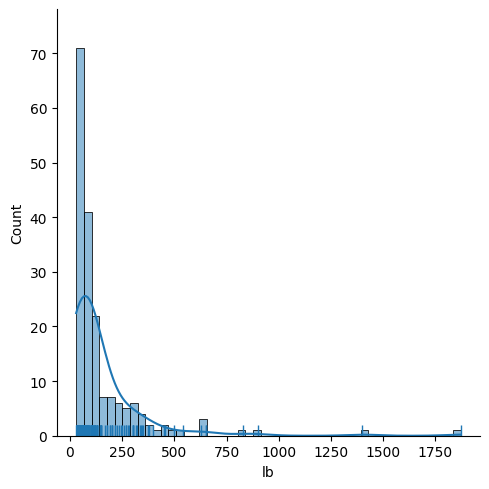

In [ ]:
# Distributions
import seaborn as sns
p = sns.displot(df2[df2['wilayah']=="Lampung-SumateraSelatan"]['lb'], kde = True, rug = True)

Terlihat bahwa distribusi dari `lb` di `wilayah` Lampung-Sumatera Selatan *right-skewed*, maka imputasi *missing value* akan dilakukan dengan menggunakan median.

In [ ]:
df2['lb'].fillna(df2[df2['wilayah']=="Lampung-SumateraSelatan"]['lb'].median(), inplace = True)

### Kolom `kt`

In [ ]:
df2['kt'].unique()

array([2, 1, 3, 4, 5, 8, 6, 109.0, 7.0, nan, 11.0, 9, 15, 10, 16, 14.0,
       13.0, 22, 12, 19, 28, '-', 20], dtype=object)

Karena terdapat *missing value* dan data yang tidak sesuai yaitu "-", maka data tersebut akan digantikan dengan 0 karena menandakan bahwa rumah tersebut tidak memiliki kamar tidur.

In [ ]:
index_salah = df2.index[df2['kt']=="-"].tolist()
df2.loc[index_salah, 'kt'] = 0

In [ ]:
df2[df2['kt'].isnull()]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
316,2021-03-12,117.0,117.0,NaN,NaN,NaN,NaN,"Pringsewu, Jalan Ahmad Yani, Lampung",SHM,NaN,Utara,68500000,https://rumahdijual.com/lampung/11764150-tanah...,Lampung-SumateraSelatan
2193,2021-06-12,96.0,66.0,NaN,NaN,NaN,NaN,Medan Deli,SHM,NaN,Selatan,2300000000,https://www.rumah123.com/properti/medan/hos928...,Medan


In [ ]:
df2['kt'].fillna(0, inplace = True)

In [ ]:
df2['kt'] = df2['kt'].astype("int")

Karena terdapat data yang aneh yaitu jumlah kamar tidur sebanyak 109, akan dicek apakah data tersebut valid/tidak.

In [ ]:
df2[df2['kt']==109]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
298,2021-05-12,1716.0,1871.0,109,106.0,NaN,NaN,"Rajabasa, Bandar Lampung",SHM,Token,Selatan,11000000000,https://rumahdijual.com/lampung/9635319-kost-m...,Lampung-SumateraSelatan


In [ ]:
df2[df2['kt']==109]['url']

298    https://rumahdijual.com/lampung/9635319-kost-m...
Name: url, dtype: object

*Link* tersebut tidak mengarah pada detail rumah yang dijual, namun keterangan dalam *link* tersebut memuat kata "kost" yang berarti properti yang dijual dalam *link* tersebut merupakan kost, bukan rumah. Jumlah kamar tidur tersebut sangat tidak masuk akal untuk ukuran sebuah rumah, namun masuk akal untuk ukuran kost. Karena case study EDA ini hanya berfokus pada data rumah, maka observasi tersebut akan kami hapus.

In [ ]:
df2 = df2.drop(298)

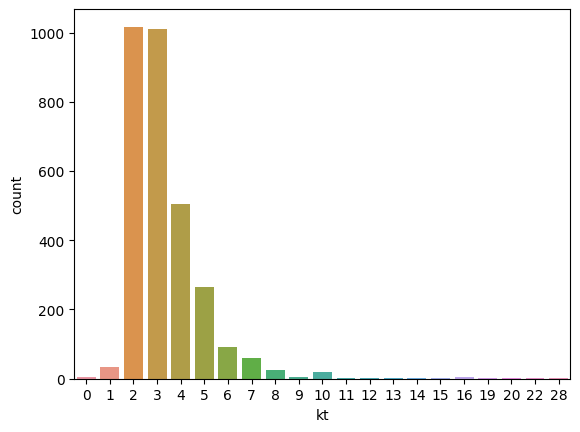

In [ ]:
# Distributions
p = sns.countplot(x ='kt', data = df2)

### Kolom `km`

In [ ]:
percent_missing = df2.isnull().sum()*100/len(df2)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
created_at,created_at,0.000000
lt,lt,0.000000
lb,lb,0.000000
kt,kt,0.000000
km,km,0.130506
garasi,garasi,34.290375
carport,carport,18.075041
lokasi,lokasi,0.000000
sertifikat,sertifikat,0.293638
listrik,listrik,7.308320


In [ ]:
df2['km'].unique()

array([1, 2, 3, 6, 5, 4, 7.0, nan, 11.0, 8, 9, 16.0, 10, 13.0, 43, 29, 12,
       19, 28, '-', 20], dtype=object)

Karena terdapat *missing value* dan data yang tidak sesuai yaitu "-", maka data tersebut akan digantikan dengan 0 karena menandakan bahwa rumah tersebut tidak memiliki kamar mandi.

In [ ]:
df2[df2['km'].isnull()]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
316,2021-03-12,117.0,117.0,0,NaN,NaN,NaN,"Pringsewu, Jalan Ahmad Yani, Lampung",SHM,NaN,Utara,68500000,https://rumahdijual.com/lampung/11764150-tanah...,Lampung-SumateraSelatan
868,2023-08-18,215.0,40.0,2,NaN,NaN,NaN,"Landasan Ulin, Banjar Baru, Kalimantan Selatan",SHM,900.0,NaN,195000000.0,https://www.rumah.com/listing-properti/dijual-...,Kalimantan(All)
1815,2021-03-12,364.0,494.0,5,NaN,1.0,NaN,Kota Bekasi,NaN,NaN,NaN,2485000000,https://www.iklanrumah.com/list/detail/37392/r...,Bekasi
2193,2021-06-12,96.0,66.0,0,NaN,NaN,NaN,Medan Deli,SHM,NaN,Selatan,2300000000,https://www.rumah123.com/properti/medan/hos928...,Medan


In [ ]:
index_salah = df2.index[df2['km']=="-"].tolist()
df2.loc[index_salah, 'km'] = 0

In [ ]:
df2['km'].fillna(0, inplace = True)

In [ ]:
df2['km'] = df2['km'].astype("int")

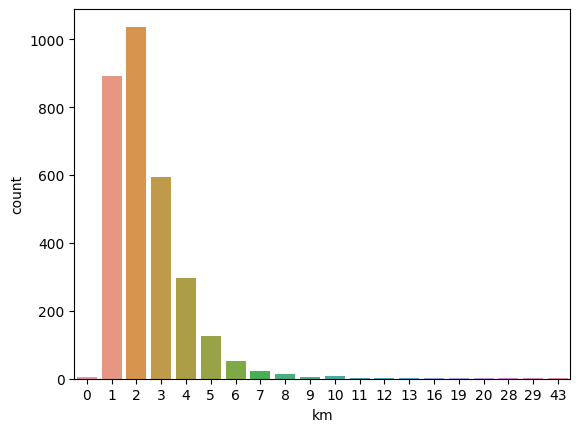

In [ ]:
# Distributions
p = sns.countplot(x ='km', data = df2)

Karena terdapat data yang aneh yaitu jumlah kamar mandi lebih dari 20, akan dicek apakah data tersebut valid/tidak. Hal tersebut dapat menandakan bahwa data yang dimasukkan bukan berupa rumah.

In [ ]:
df2[df2['km']>20]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
2122,2023-05-09,200.0,250.0,4,43,1.0,1.0,Mekar Wangi,SHM,2200.0,Utara,3250000000.0,https://www.rumah.com/listing-properti/dijual-...,Bandung
2707,2023-09-14,650.0,1175.0,22,29,1.0,1.0,Seminyak,SHM,38500.0,NaN,21000000000,https://www.rumah.com/listing-properti/dijual-...,Bali
2923,2021-07-02,952.0,875.0,28,28,-,-,"Palu Selatan, Palu",SHM,-,-,RP. 1.500.000.000,https://www.rumah123.com/properti/palu/hos8516...,Sulawesi(All)


In [ ]:
df2[df2['km']>20]['url']

2122    https://www.rumah.com/listing-properti/dijual-...
2707    https://www.rumah.com/listing-properti/dijual-...
2923    https://www.rumah123.com/properti/palu/hos8516...
Name: url, dtype: object

Karena *link* tersebut tidak dapat dibuka, maka kevalidan dari data tersebut tidak dapat dipastikan. Oleh karena itu, data tersebut akan dibiarkan saja.

### Kolom `garasi`

In [ ]:
percent_missing = df2.isnull().sum()*100/len(df2)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
created_at,created_at,0.000000
lt,lt,0.000000
lb,lb,0.000000
kt,kt,0.000000
km,km,0.000000
garasi,garasi,34.290375
carport,carport,18.075041
lokasi,lokasi,0.000000
sertifikat,sertifikat,0.293638
listrik,listrik,7.308320


In [ ]:
df2['garasi'].unique()

array([1, 0, 2, 3, nan, 5.0, 4.0, 6.0, 10.0, 7.0, 8.0, 13.0, '-'],
      dtype=object)

Karena terdapat *missing value* dan data yang tidak sesuai yaitu "-", maka data tersebut akan digantikan dengan 0 dengan asumsi bahwa jika rumah tersebut tidak memiliki garasi, maka kolom garasi tidak diisi.

In [ ]:
index_salah = df2.index[df2['garasi']=='-'].tolist()
df2.loc[index_salah, 'garasi'] = 0

In [ ]:
df2['garasi'].fillna(0, inplace = True)

In [ ]:
df2['garasi'] = df2['garasi'].astype(int)

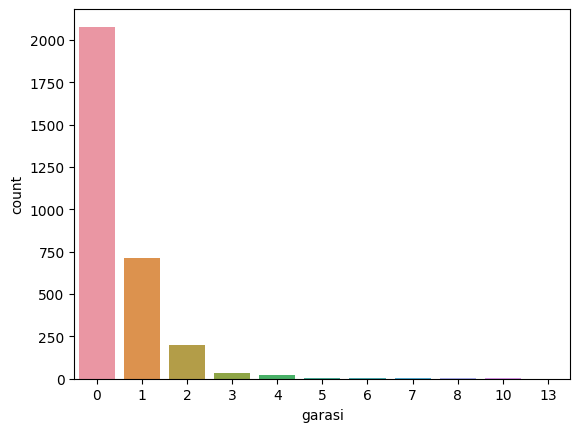

In [ ]:
# Distributions
p = sns.countplot(x ='garasi', data = df2)

Terdapat jumlah kapasitas garasi yang aneh yaitu 13. Akan dicek kevalidan dari data tersebut.

In [ ]:
df2[df2['garasi']==13]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
2769,2021-01-12,1934.0,800.0,16,16,13,13.0,Mergangsan,HP,NaN,NaN,12000000000,https://www.rumah123.com/properti/yogyakarta/h...,Yogyakarta


In [ ]:
df2[df2['garasi']==13]['url']

2769    https://www.rumah123.com/properti/yogyakarta/h...
Name: url, dtype: object

Setelah dilakukan pengecekkan ulang terhadap *link* yang terkait, didapatkan informasi bahwa rumah tersebut memiliki hanya mempunyai `carport` dengan kapasitas 13. Oleh karena itu, data `garasi` = 13, akan di-*replace* dengan 0.

In [ ]:
df2.loc[2769, 'garasi'] = 0

### Kolom `carport`

In [ ]:
df2['carport'].unique()

array([1, 2, 0, 3, 8, 7, 4, 5, nan, 6.0, 10.0, 9.0, 13.0, 19.0, '-'],
      dtype=object)

Karena terdapat *missing value* dan data yang tidak sesuai yaitu "-", maka data tersebut akan digantikan dengan 0 dengan asumsi bahwa jika rumah tersebut tidak memiliki carport, maka kolom carport tidak diisi.

In [ ]:
index_salah = df2.index[df2['carport']=='-'].tolist()
df2.loc[index_salah, 'carport'] = 0

In [ ]:
df2['carport'].fillna(0, inplace = True)

In [ ]:
df2['carport'] = df2['carport'].astype("int")

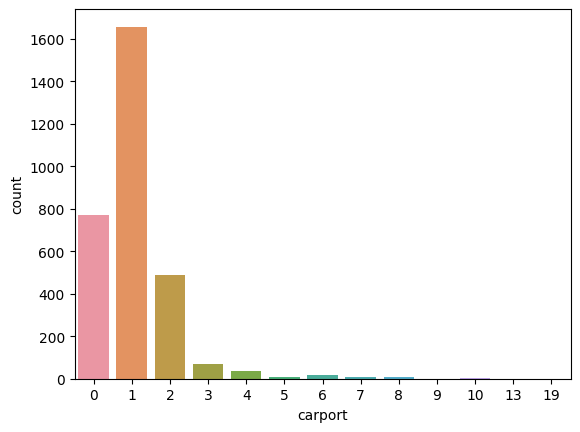

In [ ]:
# Distributions
p = sns.countplot(x ='carport', data = df2)

Karena terdapat data yang aneh yaitu jumlah *carport* lebih dari 10, akan dicek apakah data tersebut valid/tidak.

In [ ]:
df2[df2['carport']>10]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
2769,2021-01-12,1934.0,800.0,16,16,0,13,Mergangsan,HP,NaN,NaN,12000000000,https://www.rumah123.com/properti/yogyakarta/h...,Yogyakarta
2901,2023-09-21,502.0,281.0,19,19,0,19,Sleman,SHM,NaN,Utara,6500000000,https://www.lamudi.co.id/rumah-induk-19kt-kost...,Yogyakarta


In [ ]:
df2[df2['carport']>10]['url']

2769    https://www.rumah123.com/properti/yogyakarta/h...
2901    https://www.lamudi.co.id/rumah-induk-19kt-kost...
Name: url, dtype: object

Setelah dicek kebenaran datanya, ternyata benar bahwa rumah (2769) memiliki kapasitas parkir 10-13 mobil dan sesuai deskripsi iklan, rumah (2901) memang merupakan rumah induk kost, maka kevalidan dari data tersebut dapat dipastikan.

### Kolom `lokasi`

In [ ]:
df2['lokasi'] = [i.title() for i in df2['lokasi']]

### Kolom `sertifikat`

In [ ]:
df2['sertifikat'] = df2['sertifikat'].astype(object)

In [ ]:
df2['sertifikat'].unique()

array(['SHM', 'SHGB', 'Lainnya', 'HGB', 'SHBG', nan, 'SHM & IMB',
       'Lainnya (PPJB,Girik,Adat,dll)', 'HJB', 'PPJB',
       'lainnya(PPJB, GIRIK, ADAT, dll)', 'SHM + IMB', 'SHM + IMB + PBB',
       'SHM + Hak Pakai', 'AJB', 'Hak Pakai', 'SHM,IMB', 'SHM - IMB',
       'PPJB,Girik,Adat,dll', 'SPPJB', 'HP', 'SHM ', 'SMB ', '-'],
      dtype=object)

[1] citraindahciputra.com. (n.d.) *Apa SPPJB Itu?*. https://citraindahciputra.com/85-faqs/examples/651-apa-sppjb-itu.html

[2] detik.com. (2023). *Lengkap! Ini Macam-macam Sertifikat Tanah yang Perlu Kamu Tahu*. https://www.detik.com/properti/tips-dan-panduan/d-6804603/lengkap-ini-macam-macam-sertifikat-tanah-yang-perlu-kamu-tahu

[3] harapanrakyat.com. (2023). *Sertifikat Properti, Kenali Apa Saja Jenisnya di Sini*. https://www.harapanrakyat.com/2023/08/sertifikat-properti/

[4] lamudi.co.id. (2023). *Jenis Sertifikat Rumah yang Perlu Anda Ketahui*. https://www.lamudi.co.id/journal/jenis-sertifikat-rumah-yang-perlu-anda-ketahui/#:~:text=Sertifikat%20Hak%20Milik%20(SHM),Serta%20Akta%20Jual%20Beli%20(AJB)

[5] lamudi.co.id. (2023). *Perbedaan Hak Pakai dan Hak Guna Bangunan*. https://www.lamudi.co.id/journal/perbedaan-hak-pakai-dan-hak-guna-bangunan/#:~:text=Sertifikat%20Hak%20Pakai%20adalah%20hak,yang%20mengarah%20kepada%20unsur%20pemerasan.

[6] rumah.com. (2018). *Mengenal Sertifikat Hak Pakai dan Perbedaan Hak Milik*. https://www.rumah.com/panduan-properti/tak-puas-dengan-sertifikat-hak-pakai-ubah-jadi-hak-milik-7857#:~:text=Sertifikat%20Hak%20Pakai%20adalah%20sertifikat,pengelolaan%2C%20dan%20tanah%20hak%20milik.

[7] rumah.com. (2023). *Peran PPJB dan Legalitas dalam Transaksi Properti Berdasarkan Hukum Negara*. https://www.rumah.com/panduan-properti/apa-itu-ppjb-ppjb-adalah-10828

Dikutip dari sumber-sumber tersebut, didapatkan bahwa jenis-jenis sertifikat yang berkaitan dengan rumah/properti yaitu Sertifikat Hak Milik (SHM), Sertifikat Hak Guna Bangunan (SHGB), Girik atau Petok, Akta Jual Beli (AJB), Sertifikat Hak Satuan Rumah Susun (SHSRS), Izin Mendirikan Bangunan (IMB), Perjanjian Pengikatan Jual Beli (PPJB), Sertifikat Hak Pakai (Hak Pakai), Surat Perjanjian Pengikatan Jual Beli Tanah dan Bangunan (SPPJB), dan Sertifikat Hak Pakai (SHP).

Berdasarkan informasi tersebut, akan distandarisasi nama-nama dari sertifikat tersebut. Sertifikat HJB sepertinya terdapat kesalahan tulis, yang harusnga HGB dan sertifikat SMB mungkin juga terdapat kesalahan ketik, yang seharusnya IMB.

In [ ]:
import numpy as np
replacement_dict = {"HGB": "SHGB", "HJB": "SHGB", np.nan: "Unknown", "Lainnya (PPJB,Girik,Adat,dll)": "PPJB, Girik, Adat",
                    "lainnya(PPJB, GIRIK, ADAT, dll)": "PPJB, Girik, Adat", "SHM + IMB": "SHM, IMB", "SHM + IMB + PBB": "SHM, IMB, PBB",
                    "SHM + Hak Pakai": "SHM, Hak Pakai", "SHM,IMB": "SHM, IMB", "SHM - IMB": "SHM, IMB",
                    "PPJB,Girik,Adat,dll": "PPJB, Girik, Adat", "HP": "SHP", "SMB": "IMB", "-": "Unknown", "SHM & IMB": "SHM, IMB"}
df2['sertifikat'].replace(replacement_dict, inplace = True)

In [ ]:
df2['sertifikat'].unique()

array(['SHM', 'SHGB', 'Lainnya', 'SHBG', 'Unknown', 'SHM, IMB',
       'PPJB, Girik, Adat', 'PPJB', 'SHM, IMB, PBB', 'SHM, Hak Pakai',
       'AJB', 'Hak Pakai', 'SPPJB', 'SHP', 'SHM ', 'SMB '], dtype=object)

In [ ]:
df2['sertifikat'] = df2['sertifikat'].astype('category')

### Kolom `listrik`

In [ ]:
df2['listrik'].unique()

array([1300, 2200, 3500, 17600, 900, 5500, 4400, 6600, 16500,
       '450 Va/R-1', '3500 Watt', 'Token', '1300 Watt', '900 Watt', nan,
       '1300 KWh', '2300 Watt', 'Lainnya', '2200 Watt', '3500 KWh',
       '2400 Watt', '3300 Watt', '4400 Watt', '5500 Watt', 'Lainnya Watt',
       1200, 3300, 2000, 450, 33000, 13200, 7700.0, 11000.0, 3000.0,
       19000.0, 7600.0, 8000.0, 10000.0, 23000.0, 10600.0, 66000.0,
       18000.0, 4500.0, 13000.0, 26400.0, 9900.0, 9500.0, 0.0, 16000.0,
       3900.0, 220, 2400, 400, 2300, 4000.0, 13900.0, 2500.0, 15000,
       5000.0, 7500.0, 13300.0, 22000.0, 38500.0, 11500.0, 130.0, '-',
       4899], dtype=object)

[1] rumah.com. (2023). *Ini Cara Menghitung Daya Listrik Paling Mudah, Makin Hemat Lho!*. https://www.rumah.com/panduan-properti/cara-menghitung-daya-listrik-60557

> Untuk besaran daya listrik, umumnya menggunakan satuan Watt atau volt ampere (VA). Ada beragam besaran daya listrik yang bisa digunakan di rumah mulai dari 450 VA, 900 VA, 1,300 VA, 2,200 VA, 3,500 VA, 5,500 VA hingga 6,600 VA. Pemilihan daya listrik dapat disesuaikan dengan ukuran rumah, anggota keluarga, dan faktor apakah hunian juga digunakan sebagai lokasi usaha atau tidak.

Berdasarkan informasi tersebut, akan distandarisasi kolom `listrik` tersebut.

In [ ]:
replacement_dict = {'450 Va/R-1': 450, '3500 Watt': 3500, '1300 Watt': 1300, '900 Watt': 900, '1300 KWh': 1300000,
                    '2300 Watt': 2300, '2200 Watt': 2200, '3500 KWh': 3500000, '2400 Watt': 2400, '3300 Watt': 3300,
                    '4400 Watt': 4400, '5500 Watt': 5500, 'Lainnya Watt': 'Lainnya', 'Token': 'Lainnya'}
df2['listrik'].replace(replacement_dict, inplace = True)

In [ ]:
df2['listrik'] = df2['listrik'].apply(lambda a: str(a).replace('.0', ''))

In [ ]:
df2['listrik'].unique()

array(['1300', '2200', '3500', '17600', '900', '5500', '4400', '6600',
       '16500', '450', 'Lainnya', 'nan', '1300000', '2300', '3500000',
       '2400', '3300', '1200', '2000', '33000', '13200', '7700', '11000',
       '3000', '19000', '7600', '8000', '10000', '23000', '10600',
       '66000', '18000', '4500', '13000', '26400', '9900', '9500', '0',
       '16000', '3900', '220', '400', '4000', '13900', '2500', '15000',
       '5000', '7500', '13300', '22000', '38500', '11500', '130', '-',
       '4899'], dtype=object)

In [ ]:
df3 = df2[(df2['listrik']!='Lainnya') & (df2['listrik']!=np.nan) & (df2['listrik']!='-') & (df2['listrik']!='0') & (df2['listrik']!='nan')].copy()

In [ ]:
df3['listrik'] = df3['listrik'].astype("int")

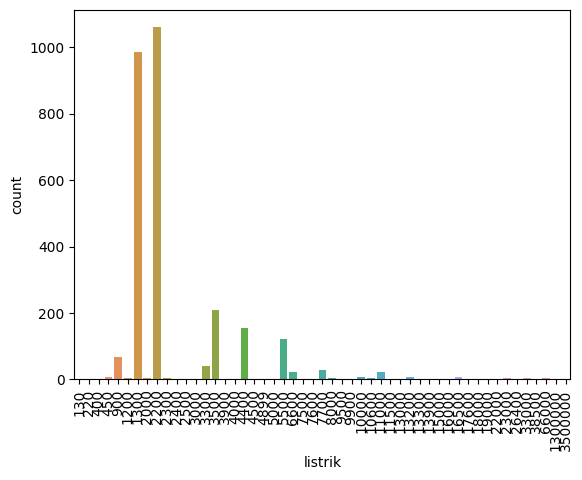

In [ ]:
import matplotlib.pyplot as plt
# Distributions
p = sns.countplot(x ='listrik', data = df3)
p.set_xticklabels(p.get_xticklabels(), rotation = 90)
plt.show()

Karena distribusinya *skew* kanan, maka nilai `listrik` yang termasuk dalam `['Lainnya', np.nan, '-', 0]` akan digantikan dengan median dari dataframe yang telah di-*filter*.

In [ ]:
index_ = df2.index[(df2['listrik']=='Lainnya') | (df2['listrik']==np.nan) | (df2['listrik']=='-') | (df2['listrik']=='0') | (df2['listrik']=='nan')].tolist()
df2.loc[index_, 'listrik'] = df3['listrik'].median()

In [ ]:
df2['listrik'] = df2['listrik'].astype(int)

### Kolom `hadap`

In [ ]:
df2['hadap'] = df2['hadap'].astype('category')
df2['hadap'] = [str(s).title() for s in df2['hadap']]

In [ ]:
df2['hadap'].unique()

array(['Barat', 'Nan', 'Selatan', 'Timur', 'Timur, Utara',
       'Selatan, Utara', 'Utara', 'Danau', 'Timur Laut', 'Barat Daya',
       'Tenggara', 'Selatan Dan Barat', 'Selatan Dan Utara', 'Barat Laut',
       'Barat  ', 'Timur Utara', 'Selatan & Barat', 'Barat & Selatan',
       'Timur ', 'Selatan Dan Timur', 'Timur - Selatan', 'Utara - Barat',
       'Utara - Selatan', 'Selatan - Barat', 'Utara-Timur', 'Timur-Utara',
       'Utara-Barat', 'Utara Dan Timur (Hook)', '-', 'Selatan/Timur'],
      dtype=object)

Akan dilakukan standarisasi nama dari nilai `hadap`.

In [ ]:
 replacement_dict = {'Nan': 'Unknown', 'Selatan Dan Utara': 'Selatan, Utara', 'Utara - Selatan': 'Selatan, Utara',
                    'Selatan Dan Barat': 'Selatan, Barat', 'Selatan - Barat': 'Selatan, Barat', 'Selatan & Barat': 'Selatan, Barat',
                    'Barat & Selatan': 'Selatan, Barat', 'Selatan Dan Timur': 'Selatan, Timur', 'Timur - Selatan': 'Selatan, Timur',
                    'Utara - Barat': 'Utara, Barat', 'Utara-Timur': 'Utara, Timur', 'Timur-Utara': 'Utara, Timur', 'Utara-Barat': 'Utara, Barat',
                    'Utara Dan Timur (Hook)': 'Utara, Timur', 'Selatan/Timur': 'Selatan, Timur', '-': 'Unknown', 'Barat  ': 'Barat',
                    'Timur ': 'Timur'}
df2['hadap'].replace(replacement_dict, inplace = True)

In [ ]:
df2['hadap'].unique()

array(['Barat', 'Unknown', 'Selatan', 'Timur', 'Timur, Utara',
       'Selatan, Utara', 'Utara', 'Danau', 'Timur Laut', 'Barat Daya',
       'Tenggara', 'Selatan, Barat', 'Barat Laut', 'Timur Utara',
       'Selatan, Timur', 'Utara, Barat', 'Utara, Timur'], dtype=object)

Karena informasi pada kolom `hadap` lebih tentang ke arah mata angin, bukan *view* depan rumahnya, akan dicek apakah rumah yang menghadap danau tersebut sebenarnya mempunyai informasi tentang rumahnya menghadap ke arah mata angin mana atau tidak.

In [ ]:
df2[df2['hadap']=='Danau']['url']

57    https://www.rumah.com/listing-properti/dijual-...
Name: url, dtype: object

Karena *link* di atas tidak bisa dibuka, maka informasi tersebut akan dibiarkan seperti itu saja.

### Kolom `url`

In [ ]:
df2['url'].fillna('Unknown', inplace = True)

In [ ]:
percent_missing = df2.isnull().sum()*100/len(df2)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
created_at,created_at,0.000000
lt,lt,0.000000
lb,lb,0.000000
kt,kt,0.000000
km,km,0.000000
garasi,garasi,0.000000
carport,carport,0.000000
lokasi,lokasi,0.000000
sertifikat,sertifikat,0.000000
listrik,listrik,0.000000


### Kolom `harga`

Karena format kolom `harga` masih tidak seragam, maka akan disamakan terlebih dahulu formatnya.

In [ ]:
import re
df2['harga'] = [re.sub(r'[^0-9]', '', str(s)) for s in df2['harga']]

In [ ]:
df2[df2['harga']=='']

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
861,2023-07-09,73.0,50.0,2,1,0,0,"Bontang Utara, Bontang, Kalimantan Timur",SHM,1300,Unknown,,Unknown,Kalimantan(All)
2130,2023-07-30,157.0,157.0,4,2,0,1,Cileunyi,SHM,1300,Unknown,,Unknown,Bandung


Karena data tersebut tidak memiliki informasi harga dan *link*-nya juga tidak ada, maka data tersebut akan dihapus.

In [ ]:
df2.drop([861, 2130], inplace = True)

In [ ]:
df2['harga'] = df2['harga'].astype(int)

Untuk mendeteksi data dalam satuan juta tetapi tidak dituliskan dalam bentuk numeriknya, jika data tersebut memenuhi <100000, maka data tersebut akan dikalikan dengan 1000000.

In [ ]:
index_salah = df2.index[df2['harga']<100000].tolist()
for i in index_salah:
  df2.loc[i, 'harga'] = df2.loc[i, 'harga']*1000000

Selanjutnya, kami akan melakukan pengecekkan terhadap harga rumah yang kurang dari 100 juta dan lebih dari 100 miliar apakah data tersebut valid atau tidak.

In [ ]:
# Cek
df2[df2['harga']<100000000]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
124,2021-01-12,93.0,36.0,2,1,0,1,Bogor Barat,SHGB,1300,Unknown,65000000,https://www.rumah.com/listing-properti/dijual-...,Bogor
125,2021-01-12,60.0,36.0,2,1,0,1,Bojonggede,SHM,1300,Unknown,70000000,https://www.rumah.com/listing-properti/dijual-...,Bogor
138,2021-04-12,119.0,36.0,2,1,0,1,Sukaraja,SHM,1300,Unknown,65000000,https://www.rumah.com/listing-properti/dijual-...,Bogor
151,2021-04-12,84.0,36.0,2,1,0,1,Dramaga,SHM,1300,Unknown,65000000,https://www.rumah.com/listing-properti/dijual-...,Bogor
314,2021-06-12,84.0,45.0,2,1,1,0,"Jalan Sitara, Lampung",SHM,1300,Unknown,30000000,https://rumahdijual.com/lampung/10219777-kredi...,Lampung-SumateraSelatan
316,2021-03-12,117.0,117.0,0,0,0,0,"Pringsewu, Jalan Ahmad Yani, Lampung",SHM,2200,Utara,68500000,https://rumahdijual.com/lampung/11764150-tanah...,Lampung-SumateraSelatan
476,2023-04-07,72.0,36.0,2,1,0,0,"Pringsewu, Pringsewu",SHM,1300,Unknown,30000000,https://www.rumah123.com/properti/pringsewu/ho...,Lampung-SumateraSelatan
957,2021-05-12,60.0,42.0,2,1,0,0,Tapos,SHM,1300,Timur,41000000,https://www.rumah123.com/properti/depok/hos928...,Depok
1130,2021-12-06,128.0,88.0,3,3,0,1,"Bsd The Icon, Tangerang","PPJB, Girik, Adat",2200,Tenggara,95000000,https://www.rumah123.com/properti/tangerang/ho...,Tangerang
1197,2021-12-06,3087.0,2500.0,5,5,10,10,"Bsd Bukit Golf, Tangerang",Unknown,66000,Unknown,100000,https://www.rumah123.com/properti/tangerang/ho...,Tangerang


In [ ]:
# Cek
df2[df2['harga']>100000000000]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
1332,2021-12-07,700.0,2000.0,10,10,0,10,Jakarta Pusat,SHM,66000,Utara,105000000000,https://www.rumah.com/listing-properti/dijual-...,Jakarta
1613,2021-11-22,1632.0,1365.0,13,13,0,0,Palembang,SHM,33000,Unknown,200000000000,https://www.rumah123.com/properti/palembang/ho...,Padang-Palembang
1988,2021-12-05,750.0,850.0,7,6,1,4,Bandung Kota,SHM,6600,Barat,150000000000,https://www.rumah.com/listing-properti/dijual-...,Bandung
2051,2023-06-06,630.0,349.0,5,5,2,2,Kota Baru Parahyangan,SHM,3500,Utara,105000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung
2084,2023-09-13,98.0,125.0,3,3,0,1,Antapani,SHM,2200,Selatan,187000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung
2085,2023-09-13,180.0,192.0,3,2,1,1,Bandung Kulon,SHM,2200,Unknown,200000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung
2087,2023-09-13,375.0,320.0,6,4,2,2,Regol,SHM,13900,Utara,550000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung
2088,2023-09-13,294.0,280.0,7,4,1,1,Cibogo,SHM,2500,Unknown,310000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung
2101,2023-08-23,980.0,360.0,4,4,2,4,Kota Baru Parahyangan,SHM,11000,Selatan,168000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung
2108,2023-08-23,980.0,360.0,4,4,2,4,Kota Baru Parahyangan,SHM,11000,Selatan,168000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung


Setelah melakukan pengecekan terhadap *link* yang terkait didapatkan informasi sebagai berikut.

Untuk rumah dengan harga < 100 juta
  - `124` seharusnya 650.000.000
  - `125` seharusnya 700.000.000
  - `138` seharusnya 650.000.00
  - `151` seharusnya 487.800.000
  - `314` seharusnya 300.000.000
  - `316` seharusnya 685.000.000
  - `476` valid 30 juta
  - `957` seharusnya 410.000.000
  - `1130` seharusnya 2 miliar
  - `1197` seharusnya 95 miliar
  - `1494` seharusnya 2,2 miliar
  - `1495` seharusnya 3,5 miliar
  - `1496` seharusnya 6,5 miliar
  - `1497` seharusnya 3,3 miliar
  - `1498` seharusnya 11,8 miliar
  - `1499` seharusnya 5,5 miliar
  - `1500` seharusnya 6,9 miliar
  - `1501` seharusnya 16,5 miliar
  - `1907` valid 80 juta
  - `2893` valid 40 juta

Untuk rumah dengan harga > 100 miliar
  - `1332` seharusnya 75 miliar
  - `1613` seharusnya 20 miliar
  - `1988` seharusnya 15 miliar
  - `2051` seharusnya 10.5 miliar
  - `2084` seharusnya 18.7 miliar
  - `2085` seharusnya 20 miliar
  - `2087` seharusnya 55 miliar
  - `2088` seharusnya 31 miliar
  - `2101` seharusnya 16.8 miliar
  - `2108` seharusnya 16.8 miliar
  - `2109` seharusnya 21.15 miliar
  - `2113` seharusnya 17.5 miliar
  - `2115` seharusnya 17 miliar
  - `2118` seharusnya 18.5 miliar
  - `2123` seharusnya 50 miliar
  - `2133` seharusnya 15.000.000.000
  - `2717` seharusnya 2.500.000.000

Berdasarkan informasi tersebut, data yang salah akan di-*replace* dengan harga aslinya.

In [ ]:
index_salah = df2.index[df2['harga']>100000000000].tolist()
index_salah = index_salah[1:-2]
index_salah

[1613,
 1988,
 2051,
 2084,
 2085,
 2087,
 2088,
 2101,
 2108,
 2109,
 2113,
 2115,
 2118,
 2123]

In [ ]:
for i in index_salah:
  df2.loc[i, 'harga'] = df2.loc[i, 'harga']/10

In [ ]:
df2.loc[124, 'harga'] = 650000000
df2.loc[125, 'harga'] = 700000000
df2.loc[151, 'harga'] = 487800000
df2.loc[138, 'harga'] = 650000000
df2.loc[314, 'harga'] = 300000000
df2.loc[316, 'harga'] = 685000000
df2.loc[957, 'harga'] = 410000000
df2.loc[1130, 'harga'] = 2000000000
df2.loc[1197, 'harga'] = 9500000000
df2.loc[1494, 'harga'] = 2200000000
df2.loc[1495, 'harga'] = 2200000000
df2.loc[1496, 'harga'] = 6500000000
df2.loc[1497, 'harga'] = 3300000000
df2.loc[1498, 'harga'] = 11800000000
df2.loc[1499, 'harga'] = 5500000000
df2.loc[1500, 'harga'] = 6900000000
df2.loc[1501, 'harga'] = 16500000000
df2.loc[1332, 'harga'] = 75000000000
df2.loc[2133, 'harga'] = 15000000000
df2.loc[2717, 'harga'] = 2500000000

### Kolom `wilayah`

In [ ]:
df2['wilayah'] = df2['wilayah'].astype('category')

### *Missing Values*

In [ ]:
percent_missing = df2.isnull().sum()*100/len(df2)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
created_at,created_at,0.0
lt,lt,0.0
lb,lb,0.0
kt,kt,0.0
km,km,0.0
garasi,garasi,0.0
carport,carport,0.0
lokasi,lokasi,0.0
sertifikat,sertifikat,0.0
listrik,listrik,0.0


### Tipe Data

In [ ]:
df2.dtypes

created_at    datetime64[ns]
lt                   float64
lb                   float64
kt                     int64
km                     int64
garasi                 int64
carport                int64
lokasi                object
sertifikat          category
listrik                int64
hadap                 object
harga                  int64
url                   object
wilayah             category
dtype: object

## Statistika Deskriptif

In [ ]:
df2.describe(include = 'all')

<ipython-input-226-f0ad31d045bc>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah
count,3063,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063,3063,3.063000e+03,3063,3.063000e+03,3063,3063
unique,244,NaN,NaN,NaN,NaN,NaN,NaN,650,16,NaN,17,NaN,3023,15
top,2023-06-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kota Semarang,SHM,NaN,Unknown,NaN,https://www.rumah123.com/perumahan-baru/proper...,Bogor
freq,366,NaN,NaN,NaN,NaN,NaN,NaN,105,2724,NaN,1747,NaN,6,295
first,2020-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,190.346827,159.931048,3.326804,2.454456,0.467516,1.084884,NaN,NaN,4.243950e+03,NaN,5.131510e+09,NaN,NaN
std,NaN,258.505403,178.321698,1.758424,1.866144,0.890570,1.130876,NaN,NaN,6.746832e+04,NaN,1.028689e+10,NaN,NaN
min,NaN,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.300000e+02,NaN,3.000000e+07,NaN,NaN
25%,NaN,81.000000,60.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,1.300000e+03,NaN,7.500000e+08,NaN,NaN


## Korelasi

<ipython-input-227-9a618ab65e9d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

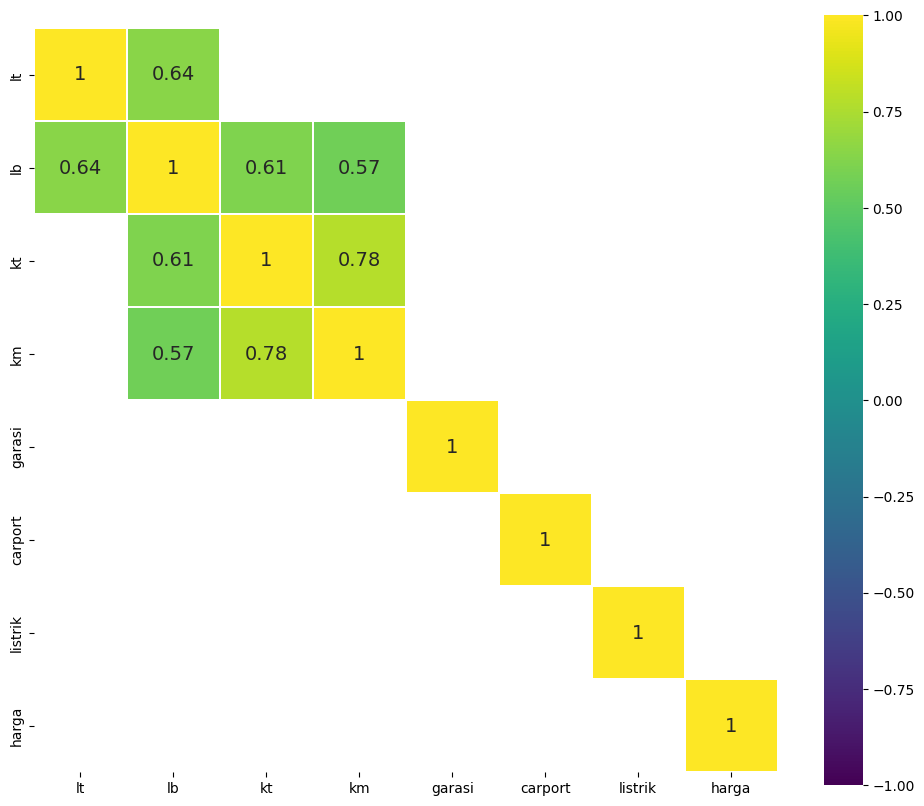

In [ ]:
corr2 = df2.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.5)], cmap = 'viridis', vmax = 1.0, vmin = -1.0,
            linewidths = 0.1, annot = True, annot_kws = {"size": 14}, square = True)

## Outlier

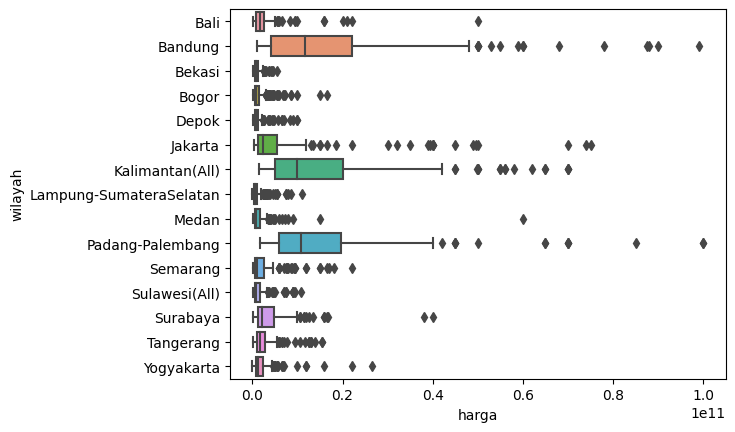

In [ ]:
p = sns.boxplot(x = "harga", y = "wilayah", data = df2)

Dari box plot untuk masing-masing wilayah di atas, terlihat bahwa terdapat banyak titik-titik di luar *range* box plot tersebut, sehingga mengindikasikan terdapatnya outlier. Untuk memisahkan outlier, maka akan dibuat kolom baru yaitu `harga/luas` agar perbandingan yang dilakukan lebih *fair*.

Untuk mendapatkan nilai harga jual per meter, **secara sederhana**, kami asumsikan nilai jual rumah dipengaruhi oleh luas tanah digabung luas bangunannya. **Dalam kasus nyata**, hal ini tentu perlu perhitungan lebih lanjut mengenai variabel lainnya, termasuk jumlah kamar tidur, kamar mandi, garasi, *carport*, kondisi rumah, lokasi, sertifikat, listrik, hingga nilai NJOP/meter.

In [ ]:
df2['harga/luas'] = df2['harga']/(df2['lt'] + df2['lb'])

Akan dipisahkan outlier dari harga berdasarkan wilayahnya masing-masing, kemudian akan dibentuk dataframe baru.

In [ ]:
indexin = []
for i in df2['wilayah'].unique():
  index_ = np.abs(df2[df2['wilayah']==i]['harga/luas'] - df2[df2['wilayah']==i]['harga/luas'].mean())<=(2*df2[df2['wilayah']==i]['harga/luas'].std())
  indexin.extend(index_)
indexout = []
for i in df2['wilayah'].unique():
  index_ = (df2[df2['wilayah']==i]['harga/luas'] - df2[df2['wilayah']==i]['harga/luas'].mean())>(-2*df2[df2['wilayah']==i]['harga/luas'].std())
  indexout.extend(index_)

In [ ]:
df3 = df2[indexin].copy()
df4 = df2[indexout].copy()

**Keterangan**: `df3`: dataframe tanpa outlier, `df4`: dataframe berisikan outlier kiri.

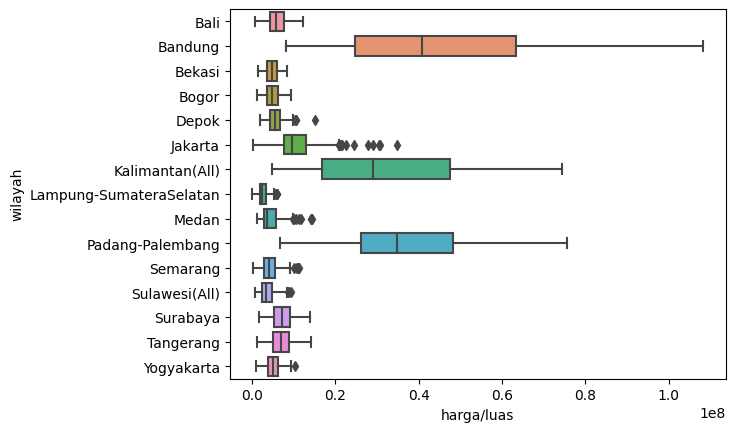

In [ ]:
p = sns.boxplot(x = "harga/luas", y = "wilayah", data = df3)

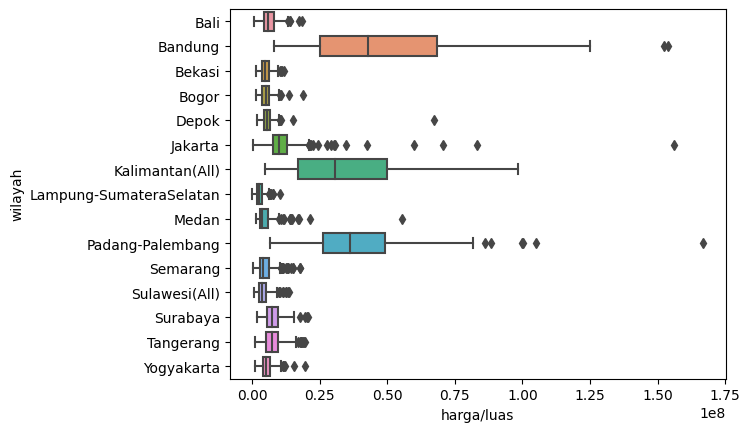

In [ ]:
p = sns.boxplot(x = "harga/luas", y = "wilayah", data = df4)

## Solusi

### **1. Kualitas data yang dimiliki perusahaan.**


1. ***Missing Values***

Setelah dilakukan pengecekan, terdeteksi bahwa data memiliki banyak *missing values*. Berikut merupakan detail persentase banyaknya *missing values* per variabel:


In [ ]:
missing_value_df1

,column_name,percent_missing
created_at,created_at,0.583658
lt,lt,0.551232
lb,lb,0.616083
kt,kt,0.648508
km,km,0.713359
garasi,garasi,34.695201
carport,carport,18.579767
lokasi,lokasi,0.583658
sertifikat,sertifikat,0.875486
listrik,listrik,7.846952


Dapat dilihat bahwa persentase *missing values* pada variabel `hadap` mencapai 54.604410%. Kami mengganti nilai yang *missing* dengan 'Unknown' dengan asumsi penjual rumah tersebut tidak mengetahui arah hadap rumah. Namun, kolom ini tetap kami pertahankan karena kami ingin mengambil suatu informasi dari kolom ini.

Khusus untuk variabel `kt`, `km`, `garasi`, dan `carport`, kami melakukan penanganan *missing values* dengan menggantikan data yang missing dengan **0** dengan asumsi bahwa jika rumah tersebut tidak memiliki kamar tidur, kamar mandi, garasi, dan carport, maka kolom tersebut tidak diisi. Sebab, jika rumah tersebut punya keempat fasilitas tersebut, akan sangat merugikan jika penjual tidak mengisi secara detail karena kamar tidur, kamar mandi, garasi, dan *carport* merupakan nilai tambah yang dapat meningkatkan harga jual rumah.

Sementara itu, penanganan *missing values* pada variabel lain kami lakukan berdasarkan karakteristik datanya. Pada data dengan *skew*, kami gunakan **median** sebagai pengganti nilai *missing*.

2. **Outlier**

Setelah melakukan pengecekan outlier, kami mengeluarkan outlier untuk melihat sebaran data yang lebih ***representative***. Berikut merupakan plot data sebelum kami memisahkan pengolahan outlier.

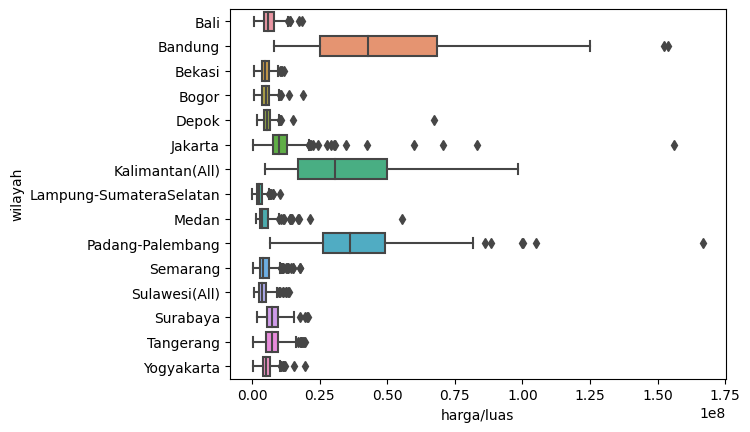

In [ ]:
p = sns.boxplot(x = "harga/luas", y = "wilayah", data = df2)

Berikut merupakan plot setelah kami lakukan pemisahan outlier.

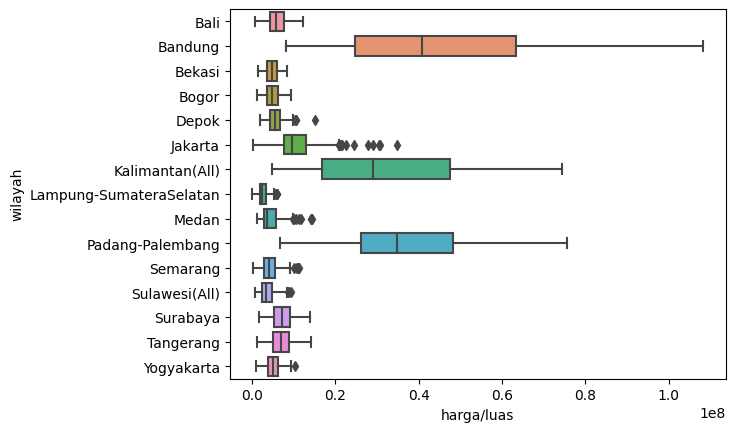

In [ ]:
p = sns.boxplot(x = "harga/luas", y = "wilayah", data = df3)

Berikut merupakan plot khusus untuk outlier.

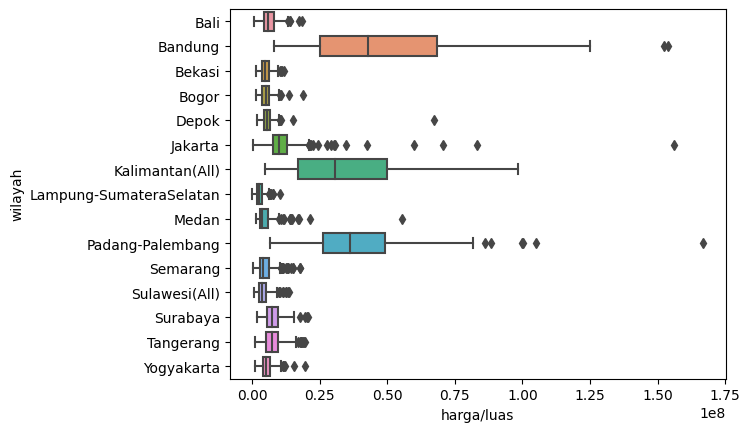

In [ ]:
p = sns.boxplot(x = "harga/luas", y = "wilayah", data = df4)

3. **Kevalidan Data**

Setelah melakukan penelitian terkait harga rumah, kami menyimpulkan bahwa harga rumah termurah yang tersedia di Indonesia adalah 100 juta Rupiah, sementara harga tertinggi mencapai 300 miliar Rupiah. Untuk memastikan keakuratan data rumah dengan harga di bawah 100 juta Rupiah, kami melakukan verifikasi dan menemukan bahwa banyak data mengalami kesalahan dalam penginputan angka **0**. Oleh karena itu, kami berasumsi bahwa kesalahan serupa juga terjadi pada kelebihan angka **0**. Kami menetapkan batas atas sebesar 100 miliar Rupiah untuk mendeteksi dan memperbaiki kesalahan penulisan angka. Hasilnya, kami harus mengoreksi sejumlah data yang mengalami kesalahan penulisan.

Link referensi:

1. Imam. (2020, September 17). 7 Tipe Rumah Berdasarkan Luas Bangunan dan Harganya. Panduan & Rujukan | Rumah123.com. https://www.rumah123.com/panduan-properti/tips-properti-66298-panduan-tipe-rumah-dilihat-dari-luas-bangunan-dan-harganya-id.html
2. Sandi, F. (2023, July 4). Harga Rumah Subsidi Resmi Naik, Termurah Rp162 Juta di Sini. CNBC Indonesia. Retrieved October 4, 2023, from https://www.cnbcindonesia.com/news/20230704165744-4-451264/harga-rumah-subsidi-resmi-naik-termurah-rp162-juta-di-sini  
3. 9 Rumah Termahal di Indonesia – Milik Pejabat dan Artis. (2023, June 12). https://blog.gethome.id/2023/06/rumah-termahal-di-indonesia/#:~:text=Rumah%20Alshad%20Ahmad%20%E2%80%93%20Harga%20perkiraan%3A%20Rp%20300%20Miliar&text=Rumah%20termahal%20di%20indonesia%20jatuh
4. Rumah Dijual di Surabaya Murah, Mulai 100 Juta. (n.d.). Rumah Dijual, Sewa Apartemen, Jual Tanah Lamudi Indonesia. Retrieved October 4, 2023, from https://www.lamudi.co.id/east-java/surabaya/house/buy/

4. **Format Data**

Terdapat perbedaan nama dari kolom di setiap *sheet*-nya. Sehingga, jika tidak dilakukan standarisasi nama kolom, kolom yang harusnya menjelaskan hal yang sama menjadi kolom yang terpisah karena Python *case sensitive*. Selain itu, tipe data tiap kolomnya tidak seragam. Misalnya dalam kolom `harga`, harga ada yang ditulis menggunakan satuan juta (tanpa 0) dan ada yang ditulis dengan menambahkan kata Rp. Dalam kolom, sertifikat, jenis sertifikat yang sama terdapat dalam beberapa jenis nama. Hal tersebut akan berpengaruh pada proses analisis, karena lagi-lagi Python *case sensitive*. Dalam kolom `hadap`, ada arah mata angin yang ditulis 'Barat  ' dan 'Barat'. Nama tersebut akan beda Python, meskipun menyatakan hal yang sama.

---

### **2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data *driven company* yang unggul**.



- Untuk kolom `deskripsi` dapat dilakukan ekstraksi informasi, seperti:
  -	Melihat jarak dari masing-masing rumah ke tempat-tempat penting seperti rumah sakit, supermarket, sekolah, transportasi umum terdekat sehingga pada analisis data selanjutnya dapat dipertimbangkan jarak dari properti yang dijual ke tempat-tempat tersebut.
  -	Penjelasan apakah rumah dijual bersama dengan *furniture* (*full furnished*).
-	Diperlukan data lebar jalan (apakah hanya 1 motor atau 1 mobil) untuk memudahkan mobilisasi. Perlu juga data apakah daerah rumah rawan bencana alam (banjir/longsor/gempa bumi/dll).
-	Perlu data NJOP harga rumah di daerah tersebut agar pembeli bisa lebih mudah membandingkan harga rumah tanpa harus mengecek manual satu per satu.
- Untuk format data, **harus** dibuat format yang baku dan seragam, baik dari nama kolom maupun tipe data per kolomnya, agar memudahkan dalam proses analisis data dan mengurangi kesalahan akibat perbedaan-perbedaan tersebut.

---

### **3. Dari data yang ada, apakah ada kecenderungan rumah di suatu kota lebih mahal/murah dibandingkan kota lain**?

In [ ]:
import plotly.express as px
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
boxplot_harga = px.box(df3, x = "wilayah", y = "harga", color = 'wilayah')
boxplot_harga.show()

Dari plot di atas, terlihat bahwa lebar dari box pada masing-masing wilayah berbeda. Misalnya pada wilayah Kalimantan (*All*), Padang-Palembang, dan Bandung, box nya lebih lebar dibandingkan dengan wilayah lainnya. Hal tersebut menandakan bahwa variansi dari harga di ketiga wilayah tersebut lebih besar dibandingkan dengan wilayah lainnya sehingga harga di ketiga wilayah tersebut akan bervariasi. Selain itu, rata-rata dari harga di masing-masing wilayah tersebut berbeda, bahkan rata-rata harga di wilayah Bandung dan Medan cukup berbeda jauh. Jadi, berdasarkan visualisasi tersebut, dapat disimpulkan bahwa terdapat kecenderungan rumah di suatu kota lebih rumah daripada kota lainnya.

---

### **4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data)**

In [ ]:
px.histogram(df3, x = "wilayah", color = "wilayah")

Dari plot di atas, dapat terlihat bahwa wilayah yang paling banyak menjual rumah adalah Bogor, diikuti dengan Kalimantan (*All*) dan Depok. Sementara, daerah yang paling sedikit menjual rumah adalah Sulawesi (*All*) diikuti dengan Lampung-Sumatera Selatan. Sebelumnya, karena belum ada informasi mengenai *marketing* perusahaan, kami akan bertanya dahulu bagaimana target *marketing* perusahaan ke depannya.

Berdasarkan data, jika perusahaan berniat meningkatkan penjualan maka tempat kantor cabang RPPI berikutnya, sebaiknya didirikan di Kota Bogor, mengingat Kota Bogor memiliki penjualan terbanyak yang berarti daerah tersebut berarti memiliki prospek yang baik. Selain itu, karena Bogor relatif dekat Depok, Tangerang, Jakarta, dan Bekasi akan menghemat biaya operasional untuk kegiatan kontrol karena jarak yang relatif dekat dan dapat memantau keempat wilayah tersebut (jika nantinya akan dilakukan investasi di keempat kota tersebut) dengan efisien. Jika perusahaan berniat mengembangkan potensi penjualan di kota yang berprospek bagus, tetapi penjualan sedikit mungkin (karena kurang terpantau sehingga perlu diperhatikan secara intensif), perusahaan bisa membuka cabang di Lampung-Sumatera Selatan. Meskipun memiliki penjualan yang sedikit, kelompok kami tidak menyarankan perusahaan membuka cabang di Sulawesi (*All*) karena berdasarkan pengolahan data, diketahui bahwa prospek penjualan rumah di Sulawesi tidak begitu tinggi. Di sisi lain, jika perusahaan berniat untuk meningkatkan keuntungan, maka tempat kantor cabang RPPI berikutnya dapat didirikan di Kota Bandung mengingat harga rumah disana relatif lebih tinggi sehingga dapat memberikan keuntungan lebih besar.

---

### **5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?**

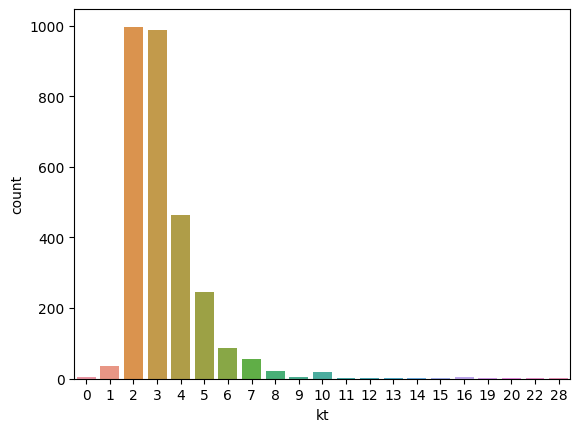

In [ ]:
import seaborn as sns
plot = sns.countplot(data = df3, x = 'kt')

Dari plot diatas, terlihat bahwa rumah yang paling banyak dijual memiliki dua kamar tidur.

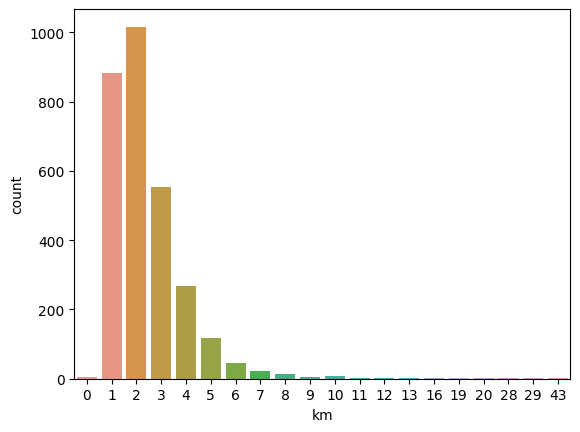

In [ ]:
plot = sns.countplot(data = df3, x = 'km')

Dari plot diatas, terlihat bahwa rumah yang paling banyak dijual memiliki dua kamar mandi.

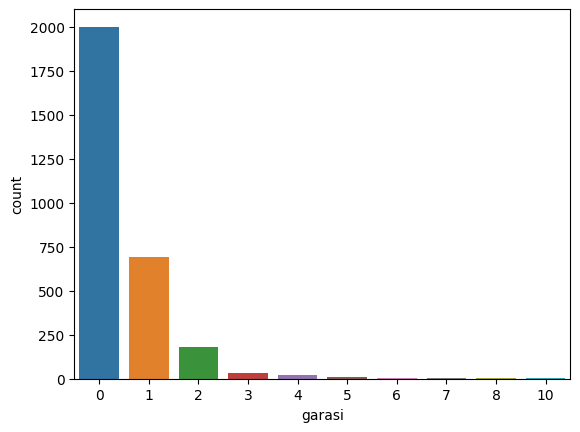

In [ ]:
plot = sns.countplot(data = df3, x = 'garasi')

Dari plot diatas, terlihat bahwa rumah yang paling banyak dijual tidak memiliki garasi.

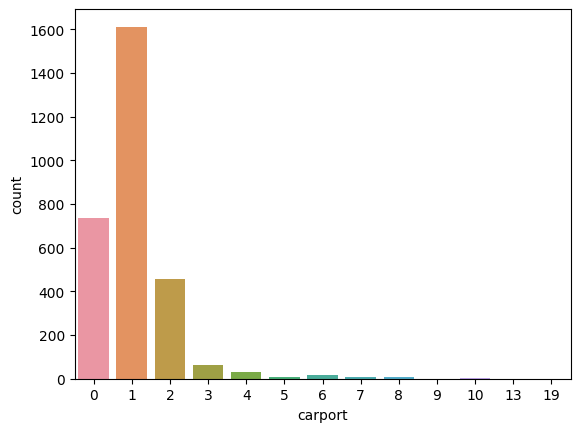

In [ ]:
plot = sns.countplot(data = df3, x = 'carport')

Dari plot diatas, terlihat bahwa rumah yang paling banyak dijual memiliki satu carport.

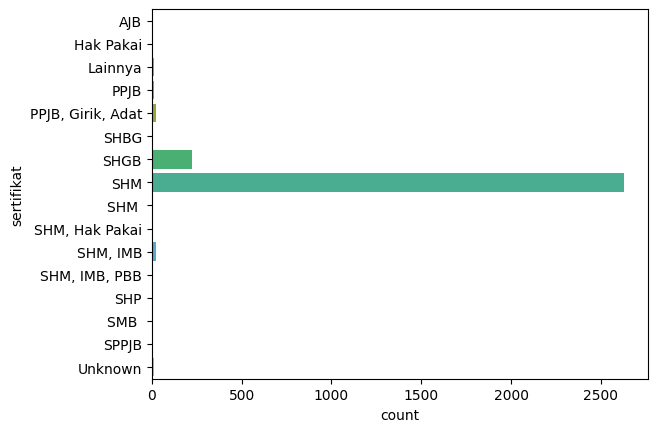

In [ ]:
p = sns.countplot(y = 'sertifikat', data = df3)

In [ ]:
df3['sertifikat'].mode()

0    SHM
Name: sertifikat, dtype: category
Categories (16, object): ['AJB', 'Hak Pakai', 'Lainnya', 'PPJB', ..., 'SHP', 'SMB ', 'SPPJB',
                          'Unknown']

Dari plot diatas, terlihat bahwa rumah yang paling banyak dijual bersertifikat SHM.

Dari plot-plot di atas, secara terpisah, diketahui bahwa karakteristik rumah yang paling banyak dijual adalah rumah yang tidak memiliki garasi, memiliki satu *carport*, memiliki dua kamar tidur, memiliki dua kamar mandi, dan bersertifikat SHM. Perlu dipahami bahwa informasi ini diperoleh dengan memperhatikan tiap variabel secara terpisah.

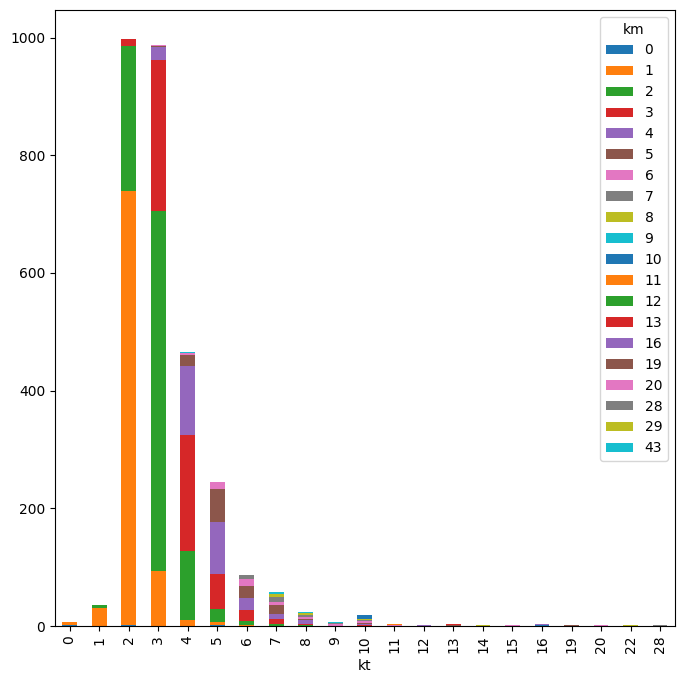

In [ ]:
CT = pd.crosstab(index = df3["kt"], columns = df3["km"])
p = CT.plot(kind = "bar", figsize = (8, 8), stacked = True)

Dari plot diatas, terlihat bahwa rumah yang paling banyak dijual memiliki dua kamar tidur dan satu kamar mandi.

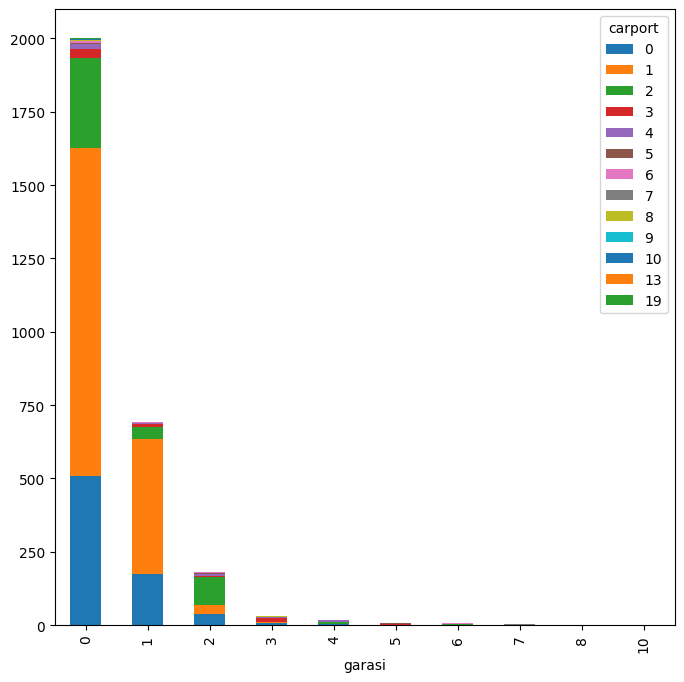

In [ ]:
CT = pd.crosstab(index = df3["garasi"], columns = df3["carport"])
p = CT.plot(kind = "bar", figsize = (8, 8), stacked = True)

Dari plot di atas, terlihat bahwa rumah yang paling banyak dijual tidak memiliki garasi dan memiliki satu *carport*.

Dari dua *stagmented chart* di atas, diperoleh informasi bahwa rumah yang paling banyak dijual memiliki dua kamar tidur dan dua kamar mandi, serta tidak memiliki garasi dan memiliki satu *carport*. Variabel `kt` dan `km` diperhatikan secara terpisah dengan garasi dan *carport*.

**Kesimpulan**:

Rumah yang banyak dijual memiliki dua kamar tidur, dua kamar mandi, tidak memiliki garasi, memiliki satu *carport*, dan bersertifikat SHM. Informasi ini diperoleh dengan memperhatikan variabel secara terpisah.

---

### **6. Jika RPPI ingin melakukan investasi (*max*) Rp25 Miliar minggu besok, apakah dari data Anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?**

Pertama, kami akan mencoba melakukan analisis terhadap harga per luas bangunan dan luas tanah di setiap daerah. Selanjutnya, kami akan mencari rumah dengan `harga/luas` yang lebih rendah daripada `harga/luas` rumah lainnya di wilayah yang sama.

Keterangan:
- Untuk data rata-rata `harga/luas`, kami gunakan `df3` (dataframe tanpa outlier) agar harga rata-rata yang didapatkan bisa lebih valid.
- Untuk pencarian rumah dengan `harga/luas` yang lebih rendah daripada `harga/luas` rumah lainnya di wilayah yang sama, kami gunakan `df2` (keseluruhan dataframe, termasuk outlier) karena kami membutuhkan data outlier juga untuk mencari rumah termurah.

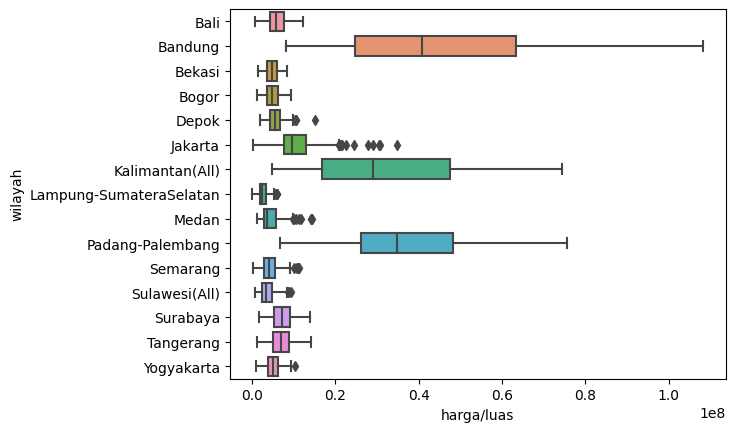

In [ ]:
p = sns.boxplot(y = 'wilayah', x = 'harga/luas', data = df3)

Dari boxplot di atas, dapat dilihat bahwa Bandung, Kalimantan (*All*), dan Padang-Palembang memiliki *range* harga yang cukup besar sehingga kami akan fokus untuk mencari rumah-rumah di daerah tersebut untuk investasi. Namun, kami juga akan tetap mencari pilihan rumah yang berada di bawah harga pasar di wilayah lain dengan tujuan menemukan potensi untuk dijadikan investasi.

In [ ]:
# Bali
mean_bali = df3[df3['wilayah']=='Bali']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Bali') & (df2['harga/luas']<mean_bali) & (df2['harga']<25000000000)]
print('Mean harga/luas di Bali:', mean_bali)
print("Minimum harga/luas di wilayah 'Bali':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Bali: 6101002.914534653
Minimum harga/luas di wilayah 'Bali': 704845.8149779736
Rumah nomor: 2573
Harga rumah: 160000000
lt: 147.0
lb: 80.0
garasi: 0
carport: 1


Untuk wilayah Bali, kami merekomendasikan rumah 2573 yang berada di Bali untuk diinvestasikan. Harga rumah tersebut adalah Rp160.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp704.845, di mana nilai ini sekitar 8,65 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Bali. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp1.224.929.060.

In [ ]:
# Bandung
mean_bandung = df3[df3['wilayah']=='Bandung']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Bandung') & (df2['harga/luas']<mean_bandung) & (df2['harga']<25000000000)]
print('Mean harga/luas di Bandung:', mean_bandung)
print("Minimum harga/luas di wilayah 'Bandung':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Bandung: 47343683.85223228
Minimum harga/luas di wilayah 'Bandung': 8214285.714285715
Rumah nomor: 1990
Harga rumah: 1150000000
lt: 80.0
lb: 60.0
garasi: 0
carport: 1


In [ ]:
df2[(df2['wilayah']=='Bandung') & (df2['harga/luas']<mean_bandung) & (df2['harga']<25000000000)].sort_values(['lb', 'lt', 'harga/luas'],ascending = [False, False, True]).where(df["sertifikat"]!="Unknown")

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah,harga/luas
1988,2021-12-05,750.0,850.0,7,6,1,4,Bandung Kota,SHM,6600,Barat,15000000000,https://www.rumah.com/listing-properti/dijual-...,Bandung,9.375000e+06
2118,2023-09-20,700.0,700.0,4,6,4,6,Setraduta,SHM,4400,Timur,18500000000,https://www.rumah.com/listing-properti/dijual-...,Bandung,1.321429e+07
2113,2023-09-13,815.0,600.0,5,3,3,4,Setra Duta,SHM,16500,Timur,17500000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung,1.236749e+07
2109,2023-08-23,1007.0,500.0,4,4,0,3,Bandung Kota,SHM,8000,Barat Laut,21150000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung,1.403451e+07
2115,2023-09-13,530.0,500.0,4,2,4,2,Pasir Kaliki,SHM,5500,Unknown,17000000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung,1.650485e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,2021-11-22,50.0,30.0,2,1,1,1,Bandung Kota,SHM,1300,Selatan,1730000000,https://www.rumah123.com/properti/bandung/hos9...,Bandung,2.162500e+07
2073,2023-07-06,50.0,30.0,1,1,1,1,Buah Batu,SHM,1300,Timur,2100000000,https://www.rumah123.com/properti/bandung/hos1...,Bandung,2.625000e+07
1986,2021-12-05,40.0,30.0,1,1,0,1,Bandung Kabupaten,SHM,1300,Selatan,1150000000,https://www.realoka.com/223062-rumah-minimalis...,Bandung,1.642857e+07
1970,2021-12-06,30.0,23.0,2,1,0,0,Bandung Kota,SHM,1300,Unknown,1350000000,https://www.rumah123.com/properti/bandung/hos9...,Bandung,2.547170e+07


Untuk wilayah Bandung, kami merekomendasikan beberapa opsi:
  - Rumah 1990 yang berada di Bandung untuk diinvestasikan. Harga rumah tersebut adalah Rp1.150.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp8.214.285, di mana nilai ini sekitar 5,7 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Bandung. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp5.478.116.200.
  - Rumah 2051 yang berada di Kota Baru Parahyangan untuk diinvestasikan. Harga rumah ini adalah Rp.10.500.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp10.725.230, di mana nilai ini lebih dari 4 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Bandung. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp58.949.892.800. Selain itu, pilihan lokasi Kota Baru Parahyangan dipengaruhi oleh fakta bahwa daerah tersebut dikembangkan agar menjadi kota hunian.
  - Rumah 1988 yang berada di Setraduta untuk diinvestasikan. Harga rumah ini adalah Rp15.000.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp9.375.000, di mana nilai ini 5 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Bandung. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp60.749.892.800. Selain itu, pilihan lokasi Setraduta dipengaruhi oleh fakta bahwa daerah tersebut dikembangkan agar menjadi kota hunian.
  - Rumah 2109 yang berada di Bandung Kota untuk diinvestasikan. Harga rumah ini adalah Rp21.150.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp14.034.510, di mana nilai ini sekitar 3 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Bandung. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp50.196.908.100.



In [ ]:
# Jakarta
mean_Jakarta = df3[df3['wilayah']=='Jakarta']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Jakarta') & (df2['harga/luas']<mean_Jakarta) & (df2['harga']<25000000000)]
print('Mean harga/luas di Jakarta:', mean_Jakarta)
print("Minimum harga/luas di wilayah 'Jakarta':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Jakarta: 11048139.025150038
Minimum harga/luas di wilayah 'Jakarta': 301204.8192771084
Rumah nomor: 1325
Harga rumah: 1050000000
lt: 3422.0
lb: 64.0
garasi: 0
carport: 1


In [ ]:
df2[(df2['wilayah']=='Jakarta') & (df2['harga/luas']<mean_Jakarta) & (df2['harga']<25000000000)].sort_values(['lb', 'lt', 'harga/luas'], ascending = [False, False, True]).where(df["sertifikat"]!="Unknown")

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah,harga/luas
1368,2021-11-22,400.0,750.0,4,3,0,2,Jakarta Barat,SHM,5500,"Selatan, Barat",8000000000,https://www.rumah.com/listing-properti/dijual-...,Jakarta,6.956522e+06
1349,2021-11-18,695.0,650.0,8,6,1,1,Jakarta Selatan,SHM,5500,Selatan,9200000000,https://rumahdijual.com/tebet/9514888-rumah-cl...,Jakarta,6.840149e+06
1513,2023-09-21,450.0,600.0,5,5,2,4,Jakarta Barat,SHM,10600,Timur,10800000000,https://www.rumah123.com/properti/jakarta-bara...,Jakarta,1.028571e+07
1403,2021-10-06,320.0,600.0,5,5,0,2,Jakarta Utara,SHM,5500,Unknown,7500000000,https://www.rumah.com/listing-properti/dijual-...,Jakarta,8.152174e+06
1500,2023-09-19,380.0,550.0,5,5,0,3,Jakarta Selatan,SHM,16000,Utara,6900000000,https://www.rumah.com/listing-properti/dijual-...,Jakarta,7.419355e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-12-06,19.0,35.0,2,1,0,0,Jakarta Pusat,SHM,2200,Unknown,395000000,https://www.rumah.com/listing-properti/dijual-...,Jakarta,7.314815e+06
1333,2021-12-07,18.0,33.0,2,1,0,0,Jakarta Pusat,SHM,2200,Unknown,425000000,https://www.rumah.com/listing-properti/dijual-...,Jakarta,8.333333e+06
1331,2021-12-02,16.0,32.0,1,1,0,0,Jakarta Pusat,SHM,2200,Unknown,380000000,https://www.rumah.com/listing-properti/dijual-...,Jakarta,7.916667e+06
1377,2021-12-07,60.0,31.0,2,1,0,1,Jakarta Barat,SHGB,1300,Unknown,497322000,https://www.rumah.com/listing-properti/dijual-...,Jakarta,5.465077e+06


Untuk wilayah Jakarta, kami merekomendasikan rumah 1325 untuk diinvestasikan. Harga rumah tersebut adalah Rp1.050.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp301.204, di mana nilai ini sekitar 36,68 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Jakarta. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp37.463.917.300

In [ ]:
# Yogyakarta
mean_Yogyakarta = df3[df3['wilayah']=='Yogyakarta']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Yogyakarta') & (df2['harga/luas']<mean_Yogyakarta) & (df2['harga']<25000000000)]
print('Mean harga/luas di Yogyakarta:', mean_Yogyakarta)
print("Minimum harga/luas di wilayah 'Yogyakarta':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Yogyakarta: 5246911.571744876
Minimum harga/luas di wilayah 'Yogyakarta': 338983.0508474576
Rumah nomor: 2893
Harga rumah: 40000000
lt: 78.0
lb: 40.0
garasi: 0
carport: 2


Untuk wilayah Yogyakarta, kami merekomendasikan rumah 2893 untuk diinvestasikan. Harga rumah tersebut adalah Rp40.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp338.983, di mana nilai ini sekitar 15,5 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Yogyakarta. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp579.135.591.

In [ ]:
# Tangerang
mean_tangerang = df3[df3['wilayah']=='Tangerang']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Tangerang') & (df2['harga/luas']<mean_tangerang) & (df2['harga']<25000000000)]
print('Mean harga/luas di Tangerang:', mean_tangerang)
print("Minimum harga/luas di wilayah 'Tangerang':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Tangerang: 7167215.523873681
Minimum harga/luas di wilayah 'Tangerang': 408653.8461538461
Rumah nomor: 1306
Harga rumah: 170000000
lt: 216.0
lb: 200.0
garasi: 1
carport: 2


Untuk wilayah Tangerang, kami merekomendasikan rumah 1306 yang berada di Tangerang untuk diinvestasikan. Harga rumah tersebut adalah Rp170.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp408.653, di mana nilai ini sekitar 17 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Tangerang. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp2.811.561.657.

In [ ]:
# Padang-Palembang
mean_pad = df3[df3['wilayah']=='Padang-Palembang']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Padang-Palembang') & (df2['harga/luas']<mean_pad)& (df2['harga']<25000000000)]
print('Mean harga/luas di Padang-Palembang:', mean_pad)
print("Minimum harga/luas di wilayah 'Padang-Palembang':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Padang-Palembang: 37655341.32171601
Minimum harga/luas di wilayah 'Padang-Palembang': 6673340.00667334
Rumah nomor: 1613
Harga rumah: 20000000000
lt: 1632.0
lb: 1365.0
garasi: 0
carport: 0


In [ ]:
df2[(df2['wilayah']=='Padang-Palembang') & (df2['harga/luas']<mean_pad) & (df2['harga']<25000000000)].sort_values(['lb', 'lt', 'harga/luas'], ascending = [False, False, True]).where(df["sertifikat"]!="Unknown")

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah,harga/luas
1613,2021-11-22,1632.0,1365.0,13,13,0,0,Palembang,SHM,33000,Unknown,20000000000,https://www.rumah123.com/properti/palembang/ho...,Padang-Palembang,6.673340e+06
1686,2023-08-07,500.0,400.0,4,4,0,4,"Padang Pasir, Padang",SHM,2200,Unknown,17500000000,https://www.rumah.com/listing-properti/dijual-...,Padang-Palembang,1.944444e+07
1537,2021-12-08,208.0,320.0,5,5,0,0,Palembang,SHM,2200,Unknown,17500000000,https://www.rumah123.com/properti/palembang/ho...,Padang-Palembang,3.314394e+07
1676,2023-09-12,600.0,300.0,5,4,0,0,"Sako Raya, Palembang",SHM,2200,Unknown,21000000000,https://www.rumah.com/listing-properti/dijual-...,Padang-Palembang,2.333333e+07
1535,2021-12-07,416.0,300.0,6,5,2,0,Padang,SHM,2200,Unknown,22000000000,https://www.rumahku.com/p/JVW408HT/rumah-dijua...,Padang-Palembang,3.072626e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2021-12-07,96.0,36.0,2,1,0,1,Padang,SHM,1300,Timur,2000000000,https://www.rumahku.com/p/2SBVH007/rumah-dijua...,Padang-Palembang,1.515152e+07
1639,2023-06-06,90.0,36.0,2,1,0,1,"Sako, Palembang",SHM,900,Unknown,3700000000,https://www.rumah123.com/properti/palembang/ho...,Padang-Palembang,2.936508e+07
1545,2021-11-25,84.0,36.0,2,1,0,1,Padang,SHM,1300,Barat Daya,2150000000,https://www.rumah123.com/properti/padang/hos92...,Padang-Palembang,1.791667e+07
1548,2021-11-22,84.0,36.0,2,1,0,0,Padang,SHM,1300,Timur,2150000000,https://www.rumah123.com/properti/padang/hos91...,Padang-Palembang,1.791667e+07


Untuk wilayah Padang-Palembang, kami merekomendasikan rumah 1613 yang berada di Padang-Palembang untuk diinvestasikan. Harga rumah tersebut adalah Rp20.000.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp6.673.340, di mana nilai ini sekitar 5,6 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Padang-Palembang. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp92.853.057.100.



In [ ]:
# Kalimantan (All)
mean_kal = df3[df3['wilayah']=='Kalimantan(All)']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Kalimantan(All)') & (df2['harga/luas']<mean_kal) & (df2['harga']<25000000000)]
print('Mean harga/luas di Kalimantan (All):', mean_kal)
print("Minimum harga/luas di wilayah 'Kalimantan (All)':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Kalimantan (All): 32453711.824771754
Minimum harga/luas di wilayah 'Kalimantan (All)': 4798449.6124031
Rumah nomor: 675
Harga rumah: 6190000000
lt: 949.0
lb: 341.0
garasi: 0
carport: 0


In [ ]:
df2[(df2['wilayah']=='Kalimantan(All)') & (df2['harga/luas']<mean_kal)&(df2['harga']<25000000000)].sort_values(['lb', 'lt', 'harga/luas'], ascending = [False, False, True]).where(df["sertifikat"]!="Unknown")

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah,harga/luas
681,2021-02-12,1120.0,700.0,10,7,0,0,"Samboja, Kutai Kartanegara",SHM,2200,Unknown,12000000000,https://www.rumah123.com/properti/kutai-kartan...,Kalimantan(All),6.593407e+06
752,2021-06-12,1120.0,700.0,10,7,0,0,"Samboja, Kutai Kartanegara",SHM,2200,Unknown,12000000000,https://www.rumah123.com/properti/kutai-kartan...,Kalimantan(All),6.593407e+06
885,2023-08-21,736.0,450.0,5,3,0,3,"Arut Selatan, Kota Waringin Barat",SHM,2200,Unknown,20000000000,https://www.rumah123.com/properti/kota-waringi...,Kalimantan(All),1.686341e+07
720,2021-06-12,532.0,403.0,6,3,0,0,"Siantan, Pontianak",SHM,2200,Unknown,6500000000,https://www.rumah123.com/properti/pontianak/ho...,Kalimantan(All),6.951872e+06
809,2023-07-06,162.0,378.0,7,6,0,1,"Sungai Raya, Kubu Raya",SHM,4400,Unknown,17000000000,https://www.rumah123.com/properti/kubu-raya/ho...,Kalimantan(All),3.148148e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,2021-05-12,108.0,36.0,2,1,0,1,"Kubu, Kubu Raya, Kalimantan Barat",SHM,1300,Timur,1950000000,https://www.rumah123.com/properti/kubu-raya/ho...,Kalimantan(All),1.354167e+07
692,2021-04-12,103.0,36.0,2,1,0,1,"Kubu, Kubu Raya, Kalimantan Barat",SHM,1300,Timur,1900000000,https://www.rumah123.com/properti/kubu-raya/ho...,Kalimantan(All),1.366906e+07
774,2021-07-12,100.0,36.0,2,1,0,1,"Tanjung Selor, Bulungan Kab., Kalimantan Utara",SHGB,2200,Unknown,1645000000,https://www.olx.co.id/item/perumahan-subsidi-t...,Kalimantan(All),1.209559e+07
742,2021-06-12,60.0,30.0,2,1,0,0,"Samarinda Utara, Samarinda, Kalimantan Timur",SHM,1300,Unknown,1950000000,https://www.rumah.com/listing-properti/dijual-...,Kalimantan(All),2.166667e+07


Untuk wilayah Kalimantan (*All*), kami merekomendasikan dua opsi:

  - Rumah 675 yang berada di Kalimantan (*All*) untuk diinvestasikan. Harga rumah tersebut adalah Rp6.190.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp4.798.449, di mana nilai ini sekitar 6,8 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Kalimantan (*All*). Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp35.675.292.500.
  - Rumah 681 yang berada di Samboja, Kutai Kartanegara untuk diinvestasikan. Harga rumah ini adalah Rp12.000.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp6.593.407, di mana nilai ini lebih dari 5 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Kalimantan(All). Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp47.065.754.781. Selain itu, pilihan lokasi Kabupaten Kutai Kartanegara berdasarkan fakta bahwa IKN akan berada di kabupaten tersebut sehingga dapat menjadi peluang meningkatnya harga rumah di wilayah tersebut.

In [ ]:
# Depok
mean_depok = df3[df3['wilayah']=='Depok']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Depok') & (df2['harga/luas']<mean_depok) & (df2['harga']<25000000000)]
print('Mean harga/luas di Depok:', mean_depok)
print("Minimum harga/luas di wilayah 'Depok':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Depok: 5559249.935450783
Minimum harga/luas di wilayah 'Depok': 1850000.0
Rumah nomor: 1008
Harga rumah: 185000000
lt: 50.0
lb: 50.0
garasi: 0
carport: 0


Untuk wilayah Depok, kami merekomendasikan rumah 1008 yang berada di Depok untuk diinvestasikan. Harga rumah tersebut adalah Rp185.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp1.850.000, di mana nilai ini sekitar 3 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Depok. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp370.924.993.

In [ ]:
# Bogor
mean_bogor = df3[df3['wilayah']=='Bogor']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Bogor') & (df2['harga/luas']<mean_bogor) & (df2['harga']<25000000000)]
print('Mean harga/luas di Bogor:', mean_bogor)
print("Minimum harga/luas di wilayah 'Bogor':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Bogor: 5063668.28572331
Minimum harga/luas di wilayah 'Bogor': 654450.2617801047
Rumah nomor: 10
Harga rumah: 250000000
lt: 312.0
lb: 70.0
garasi: 1
carport: 1


Untuk wilayah Bogor, kami merekomendasikan rumah 10 yang berada di Bogor untuk diinvestasikan. Harga rumah tersebut adalah Rp250.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp654.450, di mana nilai ini sekitar 7 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Bogor. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp1.684.321.276.

In [ ]:
# Semarang
mean_semarang = df3[df3['wilayah']=='Semarang']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Semarang') & (df2['harga/luas']<mean_semarang) & (df2['harga']<25000000000)]
print('Mean harga/luas di Semarang:', mean_semarang)
print("Minimum harga/luas di wilayah 'Semarang':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Semarang: 4543240.480978197
Minimum harga/luas di wilayah 'Semarang': 245000.0
Rumah nomor: 524
Harga rumah: 196000000
lt: 500.0
lb: 300.0
garasi: 0
carport: 1


Untuk wilayah Semarang, kami merekomendasikan rumah 524 yang berada di Semarang untuk diinvestasikan. Harga rumah tersebut adalah Rp.196.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp245.000, di mana nilai ini sekitar 18 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Semarang. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp3.438.592.000.

In [ ]:
# Medan
mean_medan = df3[df3['wilayah']=='Medan']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Medan') & (df2['harga/luas']<mean_medan) & (df2['harga']<25000000000)]
print('Mean harga/luas di Medan:', mean_medan)
print("Minimum harga/luas di wilayah 'Medan':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Medan: 4579140.730042701
Minimum harga/luas di wilayah 'Medan': 1301775.1479289941
Rumah nomor: 2256
Harga rumah: 220000000
lt: 133.0
lb: 36.0
garasi: 0
carport: 1


Untuk daerah Medan, kami merekomendasikan rumah 2256 yang berada di Medan untuk diinvestasikan. Harga rumah tersebut adalah Rp220.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp1.301.775, di mana nilai ini sekitar 3.5 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Medan. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp553.874.685.

In [ ]:
# Surabaya
mean_surabaya = df3[df3['wilayah']=='Surabaya']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Surabaya') & (df2['harga/luas']<mean_surabaya) & (df2['harga']<25000000000)]
print('Mean harga/luas di Surabaya:', mean_surabaya)
print("Minimum harga/luas di wilayah 'Surabaya':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Surabaya: 7362072.281597745
Minimum harga/luas di wilayah 'Surabaya': 1792792.792792793
Rumah nomor: 2343
Harga rumah: 199000000
lt: 75.0
lb: 36.0
garasi: 1
carport: 0


Untuk wilayah Surabaya, kami merekomendasikan rumah 2343 yang berada di Surabaya untuk diinvestasikan. Harga rumah tersebut adalah Rp199.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp1.792.792, di mana nilai ini sekitar 4 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Surabaya. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp15.037.056.000.

In [ ]:
# Sulawesi (All)
mean_sulawesi = df3[df3['wilayah']=='Sulawesi(All)']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Sulawesi(All)') & (df2['harga/luas']<mean_sulawesi) & (df2['harga']<25000000000)]
print('Mean harga/luas di Sulawesi (All):', mean_sulawesi)
print("Minimum harga/luas di wilayah 'Sulawesi (All)':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Sulawesi (All): 3863717.4871107903
Minimum harga/luas di wilayah 'Sulawesi (All)': 821018.0623973728
Rumah nomor: 2923
Harga rumah: 1500000000
lt: 952.0
lb: 875.0
garasi: 0
carport: 0


Untuk wilayah Sulawesi (*All*), kami merekomendasikan rumah 2923 yang berada di Sulawesi (*All*) untuk diinvestasikan. Harga rumah tersebut adalah Rp1.500.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp821.018, di mana nilai ini sekitar 4 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Sulawesi (*All*). Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp5.559.011.962.

In [ ]:
# Bekasi
mean_bekasi = df3[df3['wilayah']=='Bekasi']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Bekasi') & (df2['harga/luas']<mean_bekasi)& (df2['harga']<25000000000)]
print('Mean harga/luas di Bekasi:', mean_bekasi)
print("Minimum harga/luas di wilayah 'Bekasi':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Bekasi: 4846523.126040162
Minimum harga/luas di wilayah 'Bekasi': 695652.1739130435
Rumah nomor: 1907
Harga rumah: 80000000
lt: 70.0
lb: 45.0
garasi: 1
carport: 1


Untuk wilayah Bekasi, kami merekomendasikan rumah 1907 yang berada di Bekasi untuk diinvestasikan. Harga rumah tersebut adalah Rp80.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp695.652, di mana nilai ini sekitar 7 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Bekasi. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp477.350.179.

In [ ]:
# Lampung-Sumatera Selatan
mean_lampung_sumsel = df3[df3['wilayah']=='Lampung-SumateraSelatan']['harga/luas'].mean()
hasil_pencarian = df2[(df2['wilayah']=='Lampung-SumateraSelatan') & (df2['harga/luas']<mean_lampung_sumsel) & (df2['harga']<25000000000)]
print('Mean harga/luas di Lampung-Sumatera Selatan:', mean_lampung_sumsel)
print("Minimum harga/luas di wilayah 'Lampung-Sumatera Selatan':", hasil_pencarian['harga/luas'].min())
print("Rumah nomor:", hasil_pencarian['harga/luas'].idxmin())
print('Harga rumah:', hasil_pencarian['harga'][hasil_pencarian['harga/luas'].idxmin()])
print('lt:', hasil_pencarian['lt'][hasil_pencarian['harga/luas'].idxmin()])
print('lb:', hasil_pencarian['lb'][hasil_pencarian['harga/luas'].idxmin()])
print('garasi:', hasil_pencarian['garasi'][hasil_pencarian['harga/luas'].idxmin()])
print('carport:', hasil_pencarian['carport'][hasil_pencarian['harga/luas'].idxmin()])

Mean harga/luas di Lampung-Sumatera Selatan: 2688295.388092444
Minimum harga/luas di wilayah 'Lampung-Sumatera Selatan': 152671.75572519083
Rumah nomor: 369
Harga rumah: 400000000
lt: 2500.0
lb: 120.0
garasi: 0
carport: 0


Untuk wilayah Lampung-Sumatera Selatan, kami merekomendasikan rumah 369 yang berada di Lampung-Sumatera Selatan untuk diinvestasikan. Harga rumah tersebut adalah Rp400.000.000. Harga jual per luas pada rumah ini adalah sekitar Rp152.671, di mana nilai ini sekitar 17 kali lipat lebih rendah dari rata-rata harga jual per luas rumah di Lampung-Sumatera Selatan. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp6.643.334.880.

#### **Kesimpulan Rekomendasi:**

Pertama, karena tidak dijelaskan bagaimana psikologi investasi perusahaan, kami akan menanyakan dahulu kepada perusahaan, seberapa besar tingkat risiko yang berani mereka ambil dan berapa lama jangka waktu yang mereka inginkan. Sebelumnya, perlu dipertimbangkan juga faktor lain yang mungkin mempengaruhi harga jual kembali, seperti cepat/lambatnya proses jual beli.
Jika data untuk mengetahui informasi ini tidak ada, bisa disarankan ke perusahaan untuk me-*record* data ini. Selain itu, penting bagi perusahaan untuk **survei secara langsung kelayakan kondisi rumah yang hendak dibeli**.
Setelah melakukan pengecekan pada tiap wilayah, kami akan fokus pada wilayah yang berpotensi memberikan keuntungan lebih besar, seperti rumah-rumah di Bandung, Padang-Palembang, Jakarta, dan Kalimantan.

Rekomendasi:

- Jika tingkat risiko investasi perusahaan adalah **konservatif (rendah)**, maka kami menyarankan Perusahaan untuk membeli rumah di satu wilayah saja, yaitu Bandung agar perusahaan dapat fokus memantau penjualan rumah. Kami memilih Bandung karena harga/luas rumah-rumah di Bandung memiliki range yang cukup besar sehingga berpotensi untuk memberikan keuntungan yang lebih besar. Kami menyarankan rumah Rumah 1990 dan rumah 2109 yang berada di Bandung untuk diinvestasikan. Total harga kedua rumah tersebut adalah Rp22.300.000.000. Jika berhasil menjual rumah ini dengan harga/luas rata-rata saja, perusahaan dapat meraup keuntungan sekitar Rp55.283.131.110.

- Jika tingkat risiko investasi perusahaan adalah **moderat (sedang)**, maka kami menyarankan dapat dilakukan dengan rekomendasi rumah 1613 di Padang-Palembang dan rumah 1325 di Jakarta dengan total harga Rp21.050.000.000. Jika keuntungan dapat diperoleh secara maksimal, maka perusahaan berkemungkinan untuk memperoleh keuntungan sekitar Rp130.316.975.000.

- Jika tingkat risiko investasi perusahaan adalah **agresif (tinggi)**, maka kami menyarankan perusahaan untuk membeli rumah 681 di Kalimantan, rumah 2051 di Bandung, dan rumah 1325 di Jakarta dengan total harga Rp23.550.000.000. Jika keuntungan dapat diperoleh secara maksimal pada kedua lokasi, maka perusahaan berkemungkinan untuk memperoleh keuntungan sekitar Rp143.479.565.000.

---

### **7. Dan yang terpenting, informasi berharga apa lagi yang bisa Anda dapatkan dari data?**

In [ ]:
import matplotlib.pyplot as plt
def calculate_mean_target_per_category(df2, var):
  """
  Calculates the mean price per category of a categorical variable
  """
  total_houses = len(df2)
  # Percentage per category
  temp_df = pd.Series((df2[var].value_counts()/total_houses)*100).reset_index()
  temp_df.columns = [var, 'percentage']
  # Add the mean harga
  temp_df = temp_df.merge(df2.groupby([var])['harga/luas'].median().reset_index(), on = var, how = 'left')
  return temp_df
def plot_categories(df2, var):
  """
  Plots percentage of the categorical variable in the left y axis against the categories
  with the average price of the target
  """
  fig, ax = plt.subplots(figsize = (15, 4))
  plt.xticks(df2.index, df2[var], rotation = 90)
  ax2 = ax.twinx()
  ax.bar(df2.index, df2["percentage"], color = 'lightgrey')
  ax2.plot(df2.index, df2["harga/luas"], color = 'green', label = 'Average Harga/Luas')
  ax.axhline(y = 5, color = 'red')
  ax.set_ylabel('Percentage per Category')
  ax.set_xlabel(var)
  ax2.set_ylabel('Average Harga/Luas per Category')
  plt.legend()
  plt.ticklabel_format(style = 'plain', axis = 'y')

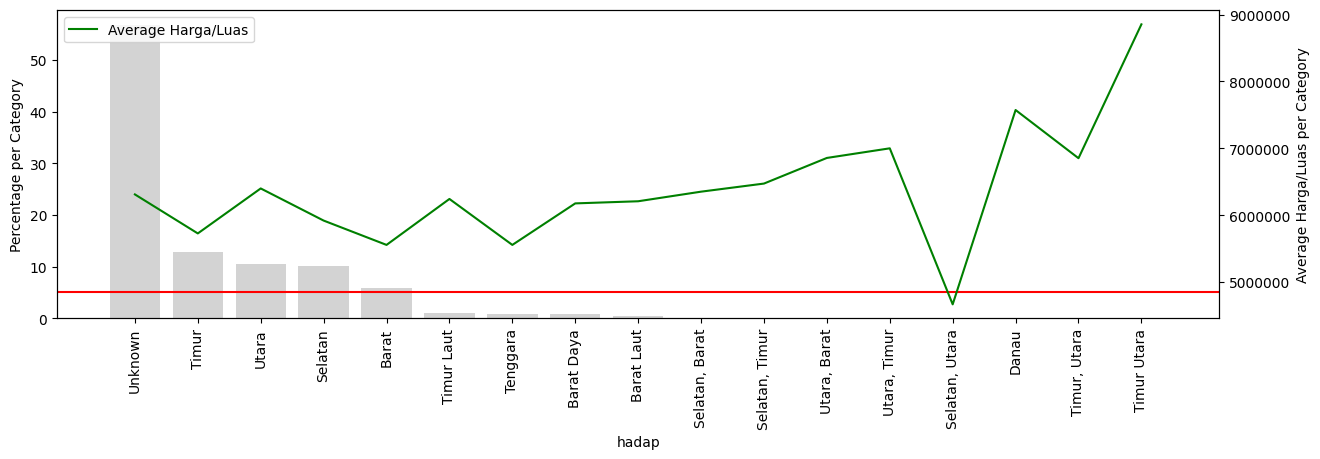

In [ ]:
temp_df = calculate_mean_target_per_category(df3, 'hadap')
plot_categories(temp_df, 'hadap')

Berdasarkan visualisasi di atas, terlihat bahwa timur merupakan arah rumah yang banyak dijual dalam data ini, selain *unknown*. Dari persentase yang lebih dari 5%, harga/luas rata-rata tertinggi dari kategori `hadap` yaitu arah utara.

[1] berita.99.co. (2023). *5 Fakta Tentang Fengshui Rumah Hadap Utara. Benarkah Bawa Untung Buat Penghuni?*. https://berita.99.co/fengshui-rumah-hadap-utara/#:~:text=Menurut%20primbon%20Jawa%2C%20fengshui%20rumah,segi%20kehidupan%20maupun%20usaha%20penghuninya.

[2] popmama.com. (2023). *5 Fakta Feng Shui Rumah Menghadap Utara*. https://www.popmama.com/life/home-and-living/rindi-1/rumah-menghadap-utara-menurut-feng-shui

Dikutip dari sumber tersebut, menurut ilmu Feng Shui, rumah sebaiknya menghadap ke utara untuk mendatangkan keberuntungan dan kebahagiaan. Informasi tersebut dapat menjadi salah satu alasan mengapa rumah yang menghadap ke arah utara lebih mahal secara rata-rata, dibandingkan dengan rumah yang menghadap ke timur, barat, dan selatan. Hal tersebut dapat menjadi pertimbangan perusahaan dalam menentukan harga rumah yang akan dijual. Jika rumah yang dijual menghadap ke utara, faktor tersebut dapat dimasukkan ke dalam penentuan harga rumah agar dapat menambah keuntungan yang diperoleh.

Dari data tersebut, diperoleh informasi harga/luas dibandingkan per wilayah. Kolom tersebut berguna untuk membandingkan harga rumah agar lebih *fair* karena memperhitungkan faktor luas tanah dan luas bangunan. Menggunakan kolom tersebut, kami telah menyaring outlier kiri dari setiap wilayahnya.

Jika perusahaan ingin melakukan investasi lebih lanjut, di luar periode yang telah ditentukan sebelumnya, perusahaan dapat mempertimbangkan rumah-rumah berikut ini untuk diinvestasikan. **Catatan**: karena `df4` memiliki 3058 baris, maka akan ditampilkan cuplikannya saja.

In [ ]:
df4.head(10)

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah,harga/luas
0,2021-03-12,75.0,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,Bogor,6.128761e+06
1,2021-06-12,60.0,40.0,1,1,0,1,Babakan Madang,SHM,2200,Unknown,811400000,https://www.rumah123.com/perumahan-baru/proper...,Bogor,8.114000e+06
2,2021-06-12,60.0,50.0,2,2,0,1,Babakan Madang,SHM,2200,Unknown,900500000,https://www.rumah123.com/perumahan-baru/proper...,Bogor,8.186364e+06
3,2021-06-12,60.0,70.0,3,2,0,1,Babakan Madang,SHM,2200,Unknown,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Bogor,7.706923e+06
4,2021-06-12,90.0,60.0,3,2,0,2,Babakan Madang,SHM,2200,Unknown,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Bogor,8.005333e+06
5,2021-06-12,120.0,70.0,3,2,0,2,Babakan Madang,SHM,2200,Unknown,1538200000,https://www.rumah123.com/perumahan-baru/proper...,Bogor,8.095789e+06
6,2021-06-12,125.0,125.0,3,2,0,2,Babakan Madang,SHM,2200,Unknown,1946600000,https://www.rumah123.com/perumahan-baru/proper...,Bogor,7.786400e+06
7,2021-06-12,97.0,72.0,3,2,0,1,Cibinong,SHM,2200,Selatan,1230000000,https://www.rumah123.com/properti/bogor/hos920...,Bogor,7.278107e+06
8,2021-06-12,72.0,33.0,2,1,0,1,Gunung Putri,SHM,1300,Unknown,617000000,https://www.rumah123.com/properti/bogor/hos915...,Bogor,5.876190e+06
9,2021-06-12,60.0,30.0,2,1,0,1,Gunung Putri,SHM,1300,Unknown,500000000,https://www.rumah123.com/properti/bogor/hos894...,Bogor,5.555556e+06


In [ ]:
df4.tail(10)

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,wilayah,harga/luas
3074,2023-09-13,200.0,150.0,4,3,0,1,"Manggala, Makassar Kota, Sulawesi Selatan",SHM,2200,Unknown,1600000000,https://www.olx.co.id/item/di-jual-rumah-di-ma...,Sulawesi(All),4.571429e+06
3075,2023-07-24,121.0,153.0,3,3,2,2,"Wanea, Manado",SHM,4899,Barat Laut,1600000000,https://www.99.co/id/properti/rumah-dijual-80j...,Sulawesi(All),5.839416e+06
3076,2023-09-19,171.0,322.0,3,4,2,2,"Tamalate, Makassar",SHM,4400,Unknown,3800000000,https://www.99.co/id/properti/dijual-rumah-mew...,Sulawesi(All),7.707911e+06
3077,2023-09-19,51.0,48.0,2,2,0,1,"Makassar, Makassar",SHM,2200,Unknown,600000000,https://www.99.co/id/properti/rumah-2-lantai-f...,Sulawesi(All),6.060606e+06
3078,2023-09-18,135.0,80.0,3,2,0,2,"Makassar, Makassar",SHM,2200,Unknown,1100000000,https://www.99.co/id/properti/rumah-hertasning...,Sulawesi(All),5.116279e+06
3079,2023-09-19,1030.0,467.0,2,1,0,1,"Malalayang, Manado",SHM,2200,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,Sulawesi(All),1.536406e+06
3080,2023-09-18,96.0,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,Unknown,675000000,https://www.rumah.com/listing-properti/dijual-...,Sulawesi(All),3.515625e+06
3081,2023-09-17,115.0,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,Unknown,348000000,https://www.rumah.com/listing-properti/dijual-...,Sulawesi(All),2.175000e+06
3082,2023-09-14,102.0,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",SHGB,900,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,Sulawesi(All),1.005747e+06
3083,2023-07-17,127.0,72.0,2,1,0,1,"Mamuju, Sulawesi Barat",SHM,2200,Unknown,600000000,https://www.rumah123.com/properti/mamuju/hos14...,Sulawesi(All),3.015075e+06


In [ ]:
df4['wilayah'].describe()

count      3058
unique       15
top       Bogor
freq        294
Name: wilayah, dtype: object

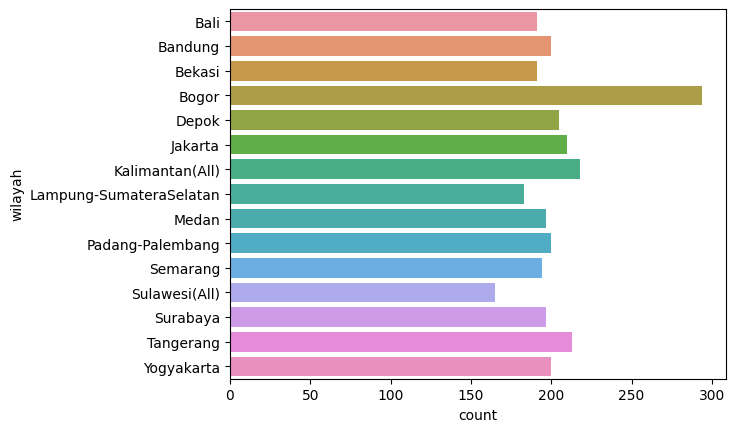

In [ ]:
plot = sns.countplot(data = df4, y = 'wilayah')

Terlihat bahwa outlier kiri tersebut paling banyak terdapat di wilayah Bogor. Jika perusahaan akan membuka kantor cabang RPPI berikutnya di Bogor dalam waktu dekat, maka akan menggurangi biaya operasional untuk kegiatan kontrol/pengecekan pada rumah-rumah dengan harga/luas yang relatif di wilayah Bogor serta wilayah-wilayah sekitarnya seperti Bekasi, Depok, Jakarta, dan Tangerang.